---
<h1><center> Analyze I - Aline Santoso</center></h1>

--- 

## Packages Used:

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

# For math and statistics
from scipy import stats
from statsmodels.regression import linear_model
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.datasets import make_blobs
from scipy import special
import math

Populating the interactive namespace from numpy and matplotlib


## Info on Data Files:

Link to data:
https://drive.google.com/file/d/1nPkf1l5j02tBGsfFw5UmMi2Q1fGuqEHY/view

The data is split into three CSV files:

1. **votes.csv** contains the number of votes for each major political party within each county.


2. **data.csv** contains various census statistics for each county, these include things like the racial makeup of the population or the overall economic status.


3. **ec.csv** contains state level electoral college votes, we will use this file for later.

## Statistics and Politics Deliverable 1:


#### 1. Load up the votes.csv and data.csv files into a Jupyter notebook. Note that you should use a Pandas dataframe to store each dataset. 
- What is the size of each dataframe? 
- How many rows? 
- How many columns?

In [2]:
# Use this code to define the path in the beginning for the instructors
votes_path = "/Users/aline/Google Drive/BrainStation/Data Science FT/2 - Analyze 1/Assignment/projectdata/votes.csv"
data_path = "/Users/aline/Google Drive/BrainStation/Data Science FT/2 - Analyze 1/Assignment/projectdata/data.csv"
ec_path = "/Users/aline/Google Drive/BrainStation/Data Science FT/2 - Analyze 1/Assignment/projectdata/ec.csv"

In [3]:
# Importing the votes and "data" datas in Panda dataframes
votes = pd.read_csv(votes_path)
data = pd.read_csv(data_path)
ec = pd.read_csv(ec_path)

In [4]:
# To find the size of each dataframe
votes_size = votes.shape
data_size = data.shape
print('The votes dataframe is a', votes_size, 'array')
print('The data dataframe is a', data_size, 'array')

The votes dataframe is a (3141, 7) array
The data dataframe is a (3141, 54) array


The votes dataframe has 3141 rows and 7 columns while the data dataframe has 3141 rows and 54 columns.  


#### 2. Take some time to examine the data, examine and familiarize yourself with the data.

- What are each of the columns measuring? 
- Do they contain absolute or relative values? 
- Are the values categorical or numeric? 

For 5 of the columns in the dataset, provide answers to these questions and create histograms of the column values if they're numerical or bar charts if they're categorical. While you're required to do this for 5 of the columns, we encourage you to mentally answer these questions for every column in the dataset.

##### Vote Dataframe

First, let's focus on the votes dataframe and take a look of what they contain. 

In [5]:
votes.head(5)

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips
0,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0,5043
1,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0,5087
2,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0,13159
3,13191.0,12792.0,8181.0,9411.0,8153.0,12652.0,8037
4,2595.0,2442.0,5543.0,5214.0,5021.0,1836.0,13091


In [6]:
# Basic statistics for votes dataframe
votes.describe()

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips
count,3.110000e+03,3.110000e+03,3110.000000,3110.000000,3109.000000,3.109000e+03,3141.00000
mean,2.230430e+04,2.114973e+04,19207.669453,19532.321222,19634.384046,2.007697e+04,30406.52149
std,7.716378e+04,7.425758e+04,44878.636253,44795.765395,40459.435551,7.203087e+04,15156.09339
min,8.000000e+00,5.000000e+00,67.000000,54.000000,57.000000,4.000000e+00,1001.00000
25%,1.811750e+03,1.556750e+03,2883.250000,2918.750000,3208.000000,1.166000e+03,18181.00000
50%,4.505500e+03,3.999000e+03,6312.000000,6450.500000,7169.000000,3.155000e+03,29179.00000
75%,1.239000e+04,1.138100e+04,16025.750000,16315.250000,17446.000000,9.610000e+03,45083.00000
max,2.295853e+06,2.216903e+06,956425.000000,885333.000000,620285.000000,1.893770e+06,56045.00000


In [7]:
# Data types for the votes dataframe
votes_types = pd.DataFrame(votes.dtypes, columns=['Data_Types'])
votes_types

,Data_Types
Democrats 08 (Votes),float64
Democrats 12 (Votes),float64
Republicans 08 (Votes),float64
Republicans 12 (Votes),float64
votes16_trumpd,float64
votes16_clintonh,float64
Fips,int64


##### "Data" dataframe
Now, let's take a look for the data dataframe. 

In [8]:
data.head(5)

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,...,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,...,0.323,0.126,747.3,79.9,0.197,0.108,449.02,NaN,82.0,NaN
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,...,0.328,0.135,247.2,131.3,0.239,0.053,245.83,NaN,96.8,NaN
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,...,0.298,0.118,324.1,402.4,0.239,0.096,205.60,NaN,71.6,NaN
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,...,0.132,0.036,190.9,133.7,0.230,0.081,123.88,NaN,42.9,3.5
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,...,0.358,0.153,497.9,315.8,0.208,0.115,477.48,8.11,79.4,NaN


In [9]:
# Basic descriptive statistics of "data" dataframe
data.describe()

,Fips,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,...,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
count,3141.00000,3109.000000,3.109000e+03,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,...,3136.000000,3136.000000,2952.000000,2320.000000,3135.000000,3135.000000,2953.000000,1251.000000,2844.000000,1414.000000
mean,30406.52149,54.940495,4.178247e+04,16.874514,83.045893,19.013419,6.449682,74.953932,25463.387576,78.778908,...,0.305523,0.107103,354.269682,174.590733,0.179860,0.077045,257.055923,6.285803,76.112553,7.737553
std,15156.09339,172.926255,1.134574e+05,7.349563,7.533330,8.646941,3.849162,5.261211,5078.837873,19.625220,...,0.042426,0.022529,273.108568,229.263418,0.054765,0.027680,207.563047,4.659909,24.604878,2.511056
min,1001.00000,1.000000,6.400000e+01,0.700000,29.900000,3.700000,0.000000,0.000000,0.000000,2.500000,...,0.131000,0.033000,37.400000,11.000000,0.031000,0.008000,0.000000,0.610000,23.300000,2.600000
25%,18181.00000,11.000000,4.847000e+03,11.400000,78.400000,13.100000,4.000000,72.300000,22332.413650,67.700000,...,0.283000,0.092000,182.550000,59.800000,0.140000,0.058000,114.620000,3.195000,59.300000,6.100000
50%,29179.00000,20.000000,1.094800e+04,15.400000,84.600000,16.900000,5.300000,75.150000,24830.888890,86.350000,...,0.307000,0.106000,271.150000,102.500000,0.177000,0.075000,201.920000,5.080000,72.800000,7.200000
75%,45083.00000,38.000000,2.882800e+04,21.600000,88.600000,22.600000,7.700000,77.950000,27548.556510,94.300000,...,0.331000,0.122000,440.350000,204.250000,0.215000,0.093000,340.650000,8.105000,88.925000,9.100000
max,56045.00000,4988.000000,2.652072e+06,52.100000,99.300000,71.000000,40.600000,100.000000,56674.350795,99.200000,...,0.479000,0.194000,2754.400000,3764.100000,0.460000,0.283000,1989.540000,51.490000,320.900000,19.600000


In [10]:
# Data types for the "data" 
data_types = pd.DataFrame(data.dtypes, columns=['Data_Types'])
data_types

,Data_Types
State,object
ST,object
Fips,int64
County,object
Precincts,float64
Votes,float64
Less Than High School Diploma,float64
At Least High School Diploma,float64
At Least Bachelors's Degree,float64
Graduate Degree,float64


Let's answer some of the questions. As a note, my column name is in the format of "dataframe.column_name"

| Column Name       | What does the column measure?|Absolute/Relative?|Categorical/Numerical?|
| ------------------|:----------------------------:|-----------------:|---------------------:|
| data.State |The state where each county is located |N/A|Categorical|
| data.Median Earnings 2010 |The median earnings of the population in 2010 in each FIPS code i.e. in each county|Absolute|Numerical|
| data.Graduate Degree|The percentage of population in each county who has graduate degree|Relative|Numerical|	
| data.Votes |The number of votes in each FIPS code i.e. in each county|Absolute|Numerical|		
| votes.votes16_trumpd|Number of votes for Trump|Relative|Numerical|

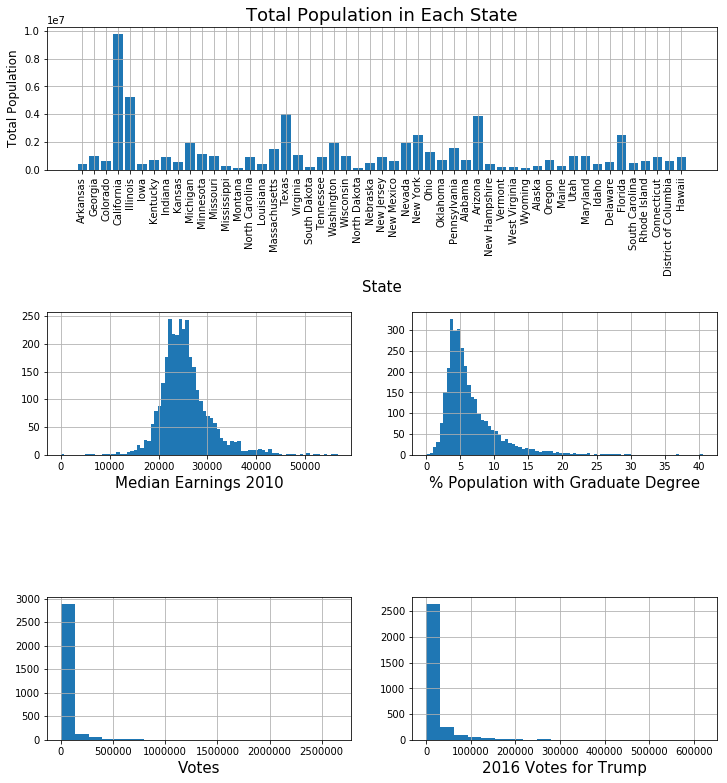

In [11]:
# Let's do the plotting now:

pylab.rcParams['figure.figsize'] = (12.0, 10.0)

# Bar chart for the total population in each state: 
plt.subplot2grid((3,2),(0,0), colspan = 2)
plt.bar(data['State'], height = data['Total Population'], label='State')
plt.xlabel('State', size=15)
plt.ylabel('Total Population',size=12)
plt.title('Total Population in Each State',size=18)
plt.xticks(rotation=90)
plt.grid()

# Histogram for Median Earnings 2010
plt.subplot2grid((3,2),(1,0))
plt.hist(data['Median Earnings 2010'], bins = 'auto')
plt.xlabel('Median Earnings 2010', size=15)
plt.grid()

# Histogram for Graduate Degree
plt.subplot2grid((3,2),(1,1))
plt.hist(data["Graduate Degree"], bins = 'auto')
plt.xlabel('% Population with Graduate Degree', size=15)
plt.grid()

# Histogram for Votes
plt.subplot2grid((3,2),(2,0))
plt.hist(data["Votes"], bins = 20)
plt.xlabel('Votes', size=15)
plt.grid()

# Histogram for votes16_trumpd
plt.subplot2grid((3,2),(2,1))
plt.hist(votes["votes16_trumpd"], bins = 20)
plt.xlabel('2016 Votes for Trump', size=15)
plt.grid()

plt.subplots_adjust(top = 1, bottom=0.01, hspace=1, wspace=0.2)
plt.show()

As can be seen from the histogram above, some of the data is positively-skewed distributed (also called right-skewed distribution). I will address this in the cleaning section of the data. 

#### 3. Now, take some steps to clean the data. Some specific questions to consider include:

   - How do you deal with null values? (There are many reasonable ways of going about this, some involve removing offending cells, while others involve filling in missing values.)
   - Are any columns duplicates? If so, remove any duplicate column.
   - What other cleanup steps would be helpful here? For each cleanup step you take, describe what you've done, why you've chosen to take this step, and include the code in the cell of your Jupyter notebook.
   
##### General Cleaning

Personally speaking, I don't like the how the names in "data" dataframe has different formats for each column. For example, there are columns with the names properly formatted such as "Adults 65 and Older Living in Poverty" and columns improperly formatted such as "Child.Poverty.living.in.families.below.the.poverty.line". I'm going to reformat these columns by removing the special characters such as "." or "_" and title capitalizing it.

In [12]:
# Remove the '.' character and replace it with space
data.columns = data.columns.str.replace('.',' ')

# Remove the '_' character and replace it with space
data.columns = data.columns.str.replace('_',' ')

# Title-capitalizing the column names
data.columns = data.columns.str.title()

# Changing St column name back to ST
data = data.rename(index = str,columns = {'St':'ST'})

##### Null/Missing Values

In general, there are 3 ways to deal with null/missing values: 
1. Ignore or drop the records with missing values
2. Fill in the values with mean/mode/median or the nearest neighbor 
3. Use the prediction model to predict the values of the missing data

Before I start dealing with the missing values though, let's check the number of null values in each column for the votes dataframe:

In [13]:
votes.isnull().sum(axis = 0)

Democrats 08 (Votes)      31
Democrats 12 (Votes)      31
Republicans 08 (Votes)    31
Republicans 12 (Votes)    31
votes16_trumpd            32
votes16_clintonh          32
Fips                       0
dtype: int64

In [14]:
# Calculating the percentage of null values in the "votes" dataframe:  
percent_null_votes = (votes.isnull().sum(axis = 0)/len(votes.index))*100
percent_null_votes

Democrats 08 (Votes)      0.986947
Democrats 12 (Votes)      0.986947
Republicans 08 (Votes)    0.986947
Republicans 12 (Votes)    0.986947
votes16_trumpd            1.018784
votes16_clintonh          1.018784
Fips                      0.000000
dtype: float64

Since the percentage of null values in the votes dataframe is really small, we can safely drop the rows with the missing values. Furthermore, since all the rows for these missing values are the same for both Trump and Clinton, just in case, let's flag them with -1. 

In [15]:
# Putting the missing votes in a separate dataframe
null_votes = pd.DataFrame(votes[votes["votes16_trumpd"].isnull()])

# Filling in the missing rows in votes with -1
votes = votes.fillna(-1)

# Let's check whether the "votes" dataframe has missing data now: 
votes.isnull().sum()

Democrats 08 (Votes)      0
Democrats 12 (Votes)      0
Republicans 08 (Votes)    0
Republicans 12 (Votes)    0
votes16_trumpd            0
votes16_clintonh          0
Fips                      0
dtype: int64

Let's check the number of null values in each column for the "data" dataframe:

In [16]:
data.isnull().sum(axis = 0)

State                                                            0
ST                                                               1
Fips                                                             0
County                                                           0
Precincts                                                       32
Votes                                                           32
Less Than High School Diploma                                    0
At Least High School Diploma                                     0
At Least Bachelors'S Degree                                      0
Graduate Degree                                                  0
School Enrollment                                                0
Median Earnings 2010                                             0
White (Not Latino) Population                                    0
African American Population                                      0
Native American Population                                    

From the information above, the State column has no null values while the ST column has 1 null value. Let's find the name of the state that is related to the missing "ST" value and fill the missing "ST" value with the correct state abbreviation. 

In [17]:
# Here, I find the index of the missing ST value and use that index to find the name of the state 
# associated to that index.
data["State"].iloc[data[data["ST"].isnull()].index]

3115    Virginia
Name: State, dtype: object

In [18]:
# Filling the missing "ST" value with "VA", the state abbreviation of the state Virginia
data["ST"].iloc[3115] = "VA"

In [19]:
# Checking whether we correctly fill "ST" in. 
data[["State","ST"]].iloc[3115]

State    Virginia
ST             VA
Name: 3115, dtype: object

Let's check the percentage of missing values in the "data" dataframe.

In [20]:
# Calculating the percentage of null values in the "votes" dataframe:  
if data.isnull().any().sum() > 0:
    percent_null_data = (data.isnull().sum(axis = 0)*100/len(data.index))
    print(percent_null_data)

State                                                          0.000000
ST                                                             0.000000
Fips                                                           0.000000
County                                                         0.000000
Precincts                                                      1.018784
Votes                                                          1.018784
Less Than High School Diploma                                  0.000000
At Least High School Diploma                                   0.000000
At Least Bachelors'S Degree                                    0.000000
Graduate Degree                                                0.000000
School Enrollment                                              0.000000
Median Earnings 2010                                           0.000000
White (Not Latino) Population                                  0.000000
African American Population                                    0

The column "Precincts" and "Votes" are both missing 32 values and the percentage of null values for these two columns are approximately 1%. With such a low percentage, let's flag these categories and fill them with -1.

In [21]:
# Getting the indexes of the missing values in the "Precincts" and "Votes" column
pd.DataFrame({"Precincts Null Index": data[data["Precincts"].isnull()].index, 
              "Votes Null Index": data[data["Votes"].isnull()].index})

,Precincts Null Index,Votes Null Index
0,139,139
1,140,140
2,397,397
3,472,472
4,684,684
5,889,889
6,1284,1284
7,1285,1285
8,1286,1286
9,1376,1376


From the table above, we can see that the missing values are from the same rows, let's drop these rows now. 

In [22]:
null_data_votes = pd.DataFrame(data[data["Votes"].isnull()])

In [23]:
# Filling in the missing rows from columns "Precincts" and "Votes" with -1 
data[["Precincts", "Votes"]] = data[["Precincts", "Votes"]].fillna(-1)

For other missing values, I will flag it with -1 values. 

In [24]:
# Checking what are the missing data left and saving it in a list
nulls = data.columns[data.isnull().any()]

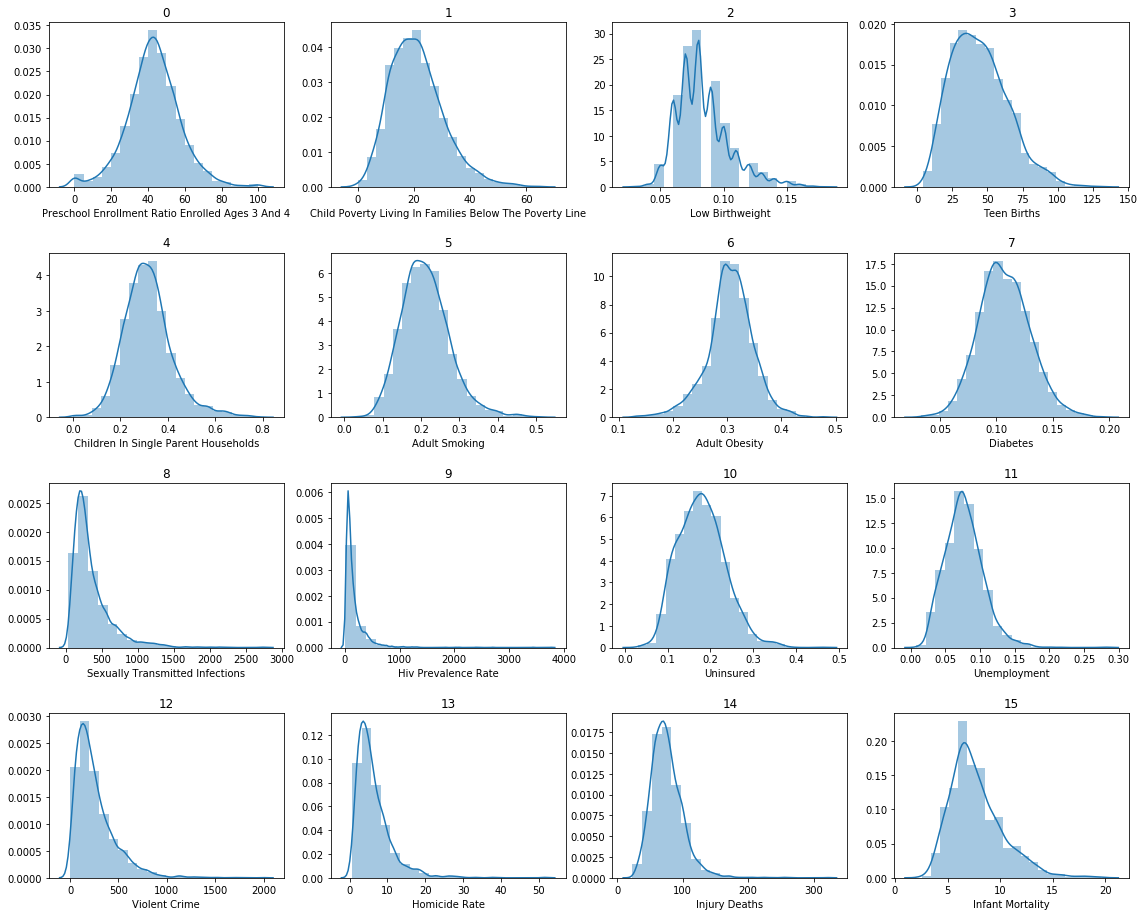

In [25]:
# Plot a histogram for each of the columns that has null values in a loop
f = plt.figure(figsize = (16,12))
for i in range(len(nulls)):
    f.add_subplot(4, 4, i+1)
    # Plotting the histogram, with column name as the x-label and the index number in the nulls list as the title
    sns.distplot(data[nulls[i]], bins = 20).set_title(nulls.get_loc(nulls[i]))
plt.tight_layout()
plt.subplots_adjust(top = 1, bottom=0.01, hspace=0.4, wspace=0.2)
plt.show()

We can generally see which ones are normally distributed from the histograms above. Hence, I will use mean to replace missing values for these columns:
1. Preschool Enrollment Ratio Enrolled Ages 3 And 4 
2. Low Birthweight
3. Teen Births
4. Children In Single Parent Households
5. Adult Smoking
6. Injury Deaths
7. Infant Mortality


In [26]:
# Replacing missing values with the mean for the first 5 indexes in the "null" list i.e.
# index 0: Preschool Enrollment Ratio Enrolled Ages 3 And 4
# index 1: Low Birthweight and so on until
# index 4: Adult Smoking
i = 0
for i in range(5):
    mean_value = data[nulls[i]].mean()
    data[nulls[i]] = data[nulls[i]].fillna(mean_value)
    i +=1

In [27]:
# Replacing missing values with the mean for items with index 9 and 10 in the "null" list
i = 9

while i <= 10:
    mean_value = data[nulls[i]].mean()
    data[nulls[i]] = data[nulls[i]].fillna(mean_value)
    i +=1

For the skewed data, I will use median to replace the missing values for these columns: 
1. Sexually Transmitted Infections
2. HIV Prevalence Rate
3. Violent Crime
4. Homicide Rate

In [28]:
# Replacing missing values with the median for items from index 5 to 8 in the "null" list

i = 5

while i <= 8:
    median_value = data[nulls[i]].median()
    data[nulls[i]] = data[nulls[i]].fillna(median_value)
    i +=1

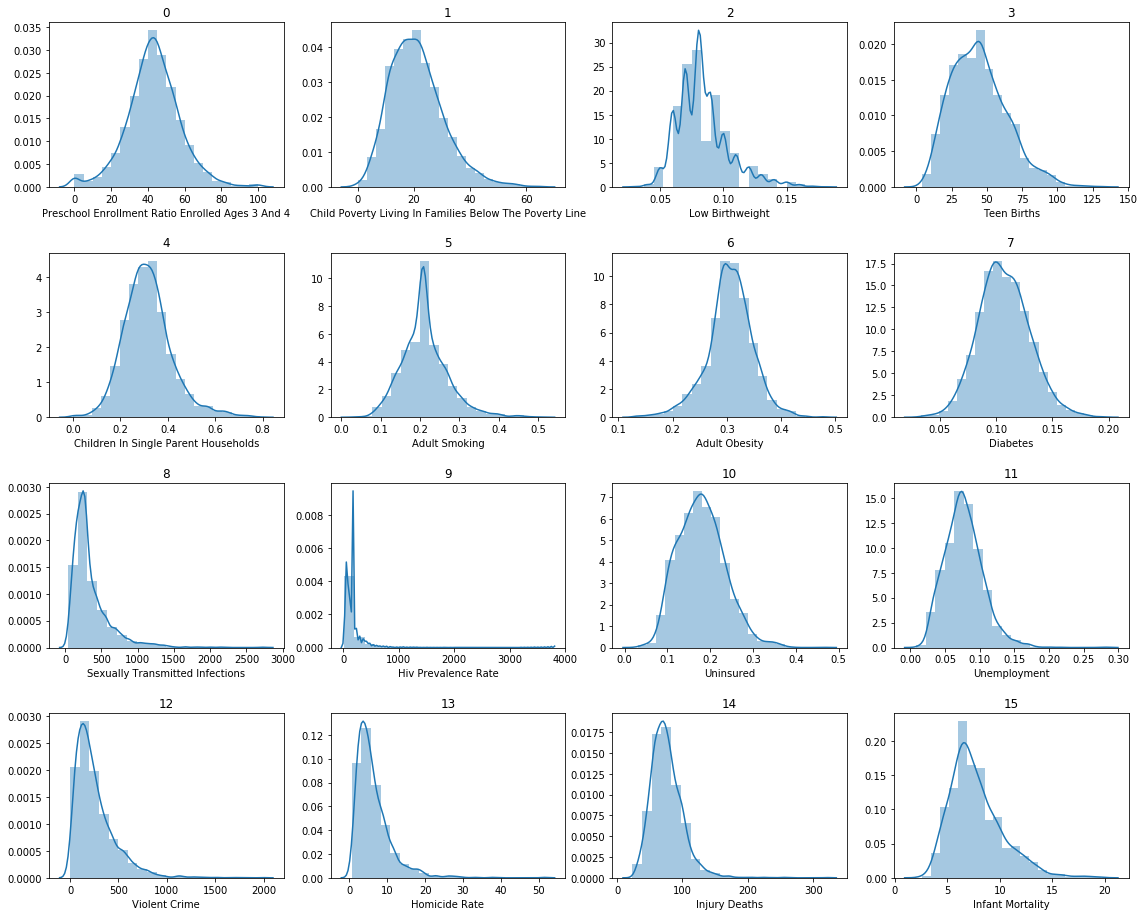

In [31]:
# Check for the distributions look like now that we have filled in the missing values
f = plt.figure(figsize = (16,12))
for i in range(len(nulls)):
    f.add_subplot(4, 4, i+1)
    sns.distplot(data[nulls[i]], bins = 20).set_title(nulls.get_loc(nulls[i]))
plt.tight_layout()
plt.subplots_adjust(top = 1, bottom=0.01, hspace=0.4, wspace=0.2)
plt.show()

##### Duplicates

Let's check for duplicates in both the data and votes dataframes. 

In [32]:
# Checking for duplicates in "data" dadtaframe: 
data.T.duplicated()
# The T here checks the duplicates based on the columns. 

State                                                         False
ST                                                            False
Fips                                                          False
County                                                        False
Precincts                                                     False
Votes                                                         False
Less Than High School Diploma                                 False
At Least High School Diploma                                  False
At Least Bachelors'S Degree                                   False
Graduate Degree                                               False
School Enrollment                                             False
Median Earnings 2010                                          False
White (Not Latino) Population                                 False
African American Population                                   False
Native American Population                      

There are 6 columns with duplicates. Now, let's drop these duplicates: 

In [33]:
# Dropping the duplicate columns
data = data.drop(['White', 'Black', 'Hispanic','Asian','Amerindian','Other'], axis = 1)

# Check whether the columns are indeed dropped
data.T.duplicated().sum()

0

In [34]:
# Let's rename the "White Asian" column into "White Asian Population" to make it cleaner
data = data.rename(index = str,columns = {'White Asian':'White Asian Population'})
data = data.rename(index = str,columns = {'Other Race Or Races':'Other Races Population'})

In [35]:
# Checking if there are any rows that are duplicated based on the Fips
data.duplicated("Fips").sum()

0

In [36]:
# Checking for duplicates in "votes dataframe:
votes.T.duplicated()

Democrats 08 (Votes)      False
Democrats 12 (Votes)      False
Republicans 08 (Votes)    False
Republicans 12 (Votes)    False
votes16_trumpd            False
votes16_clintonh          False
Fips                      False
dtype: bool

##### Skewed Distribution

As previously mentioned, some of the distributions are highly skewed. For analysis and modelling purposes, it's advisable to transform the dataset to be statistically close enough to a Gaussian dataset. When the dataset is Gaussian, statistical analysis tests such as t-test and ANOVA can then be applied to the dataset. As such, I'm going to perform a logarithmic transformation to some of the skewed data. Since population and racial demographics might have important effect on the vote results for this exercise, I'm going to make a list of column names with population in it and see their distribution. 

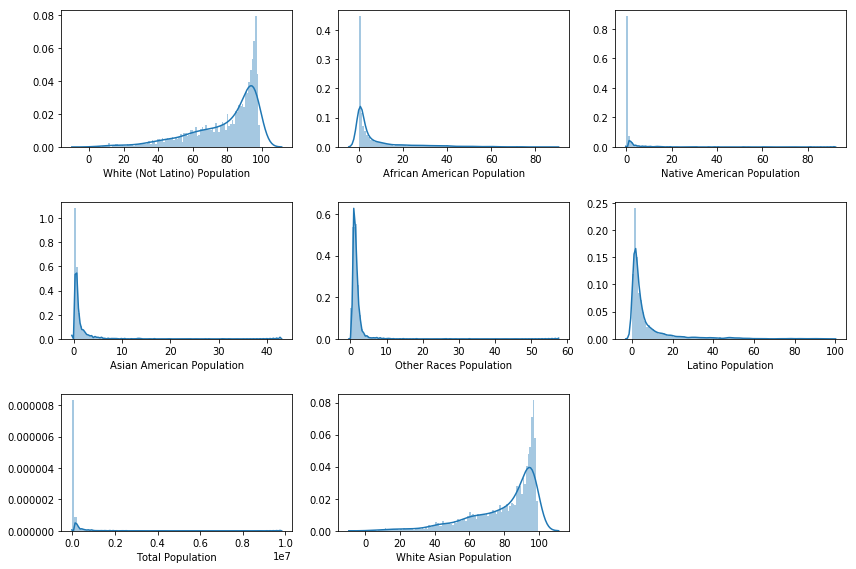

In [37]:
# Getting the list of columns that contain the population in the 'data' dataframe
population_list = [col for col in data.columns if 'Population' in col]
population_list[0]

# Plotting distribution for the population data
f = plt.figure()
for i in range(len(population_list)):
    f.add_subplot(4, 3, i+1)
    sns.distplot(data[population_list[i]], bins = 100)
plt.tight_layout()
plt.subplots_adjust(top = 1, bottom=0.01, hspace=0.4, wspace=0.2)
plt.show()

As you can see, majority of the population data is very skewed. For this exercise, let's use logarithmic transformation to normalize the distribution of the "Total Population". The same transformation can be done for other skewed data as well. 

Text(0.5, 1.0, 'Logarithmic Transformation of Total Population')

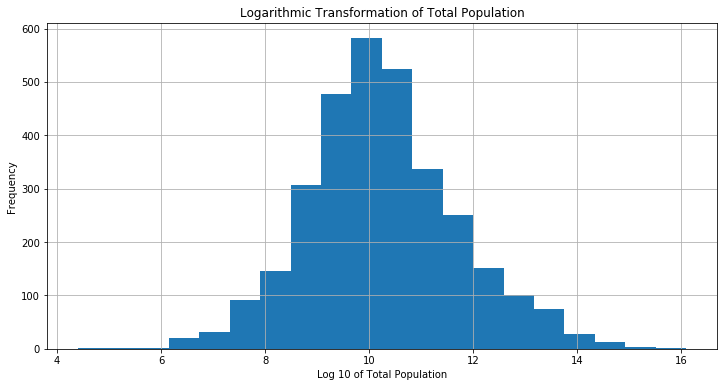

In [38]:
# Using df.hist() function to plot the dataframe
Total_Population_Log = np.log(data['Total Population'])
fig = plt.figure(figsize = (12,6))
ax = fig.gca()
Total_Population_Log.hist(ax=ax,bins=20)
ax.set_xlabel("Log 10 of Total Population")
ax.set_ylabel("Frequency")
ax.set_title("Logarithmic Transformation of Total Population")

#### 4. Finally, augment the data so that each county contains the relative vote count for each party in each election. (E.g. for each county, if the Republicans got 2300 votes and the Democrats got 1900 votes, then the relative vote shares should be 54% and 46%).

I'm going to insert the relative vote count for each party in the election to the existing votes dataframe. 

In [39]:
# Adding the relative vote count for Democrats 08, right after vote count for Democrats 08 column
votes.insert(1, "Democrats 08 (%)", round(votes["Democrats 08 (Votes)"]*100/
                                          (votes["Democrats 08 (Votes)"]+votes["Republicans 08 (Votes)"]),2))

# Adding the relative vote count for Democrats 12, right after vote count for Democrats 12 column
votes.insert(3, "Democrats 12 (%)", round(votes["Democrats 12 (Votes)"]*100/
                                          (votes["Democrats 12 (Votes)"]+votes["Republicans 12 (Votes)"]),2))

# Adding the relative vote count for Republicans 08, right after vote count for Republicans 08 column
votes.insert(5, "Republicans 08 (%)", round(votes["Republicans 08 (Votes)"]*100/
                                          (votes["Democrats 08 (Votes)"]+votes["Republicans 08 (Votes)"]),2))

# Adding the relative vote count for Republicans 12, right after vote count for Republicans 12 column
votes.insert(7, "Republicans 12 (%)", round(votes["Republicans 12 (Votes)"]*100/
                                          (votes["Democrats 12 (Votes)"]+votes["Republicans 12 (Votes)"]),2))

# Adding the relative vote count for votes16_trumpd, right after vote count for votes16_trumpd column
votes.insert(9, "votes16_trumpd (%)", round(votes["votes16_trumpd"]*100/
                                            (votes["votes16_trumpd"] + votes["votes16_clintonh"]),2))

# Adding the relative vote count for votes16_clintonh, right after vote count for votes16_clintonh column
votes.insert(11, "votes16_clintonh (%)", round(votes["votes16_clintonh"]*100/
                                            (votes["votes16_trumpd"]+votes["votes16_clintonh"]),2))

In [40]:
# Checking that the relative vote count columns are all inserted
votes.head()

,Democrats 08 (Votes),Democrats 08 (%),Democrats 12 (Votes),Democrats 12 (%),Republicans 08 (Votes),Republicans 08 (%),Republicans 12 (Votes),Republicans 12 (%),votes16_trumpd,votes16_trumpd (%),votes16_clintonh,votes16_clintonh (%),Fips
0,2598.0,40.23,2630.0,40.36,3860.0,59.77,3887.0,59.64,3967.0,62.66,2364.0,37.34,5043
1,2144.0,35.06,2099.0,32.99,3972.0,64.94,4263.0,67.01,4917.0,75.60,1587.0,24.40,5087
2,1935.0,33.07,1845.0,30.85,3916.0,66.93,4136.0,69.15,4353.0,73.82,1544.0,26.18,13159
3,13191.0,61.72,12792.0,57.61,8181.0,38.28,9411.0,42.39,8153.0,39.19,12652.0,60.81,8037
4,2595.0,31.89,2442.0,31.90,5543.0,68.11,5214.0,68.10,5021.0,73.22,1836.0,26.78,13091


## Statistics and Politics Deliverable 2

### Introduction
Now that we've gone through the process of cleaning our data and preparing it for analysis, we can begin the analysis process. See below for the key questions you'll be answering as part of this assign,ent.

### Analysis Part 1
In this part we will perform some statistical analysis on the data.

#### 1. What data columns are correlated with the Republican vote share (and which are not). Does this pattern appear in all three elections we have data for?

To find out which data columns are correlated to the Republican vote share, I will use t-test for correlation coeefficents from the stats library. 

In [41]:
# Creating a for loop to measure the p-value of the correlation coefficient for election year 2016: 

pvalues_2016 = []
# Since the column that doesn't contain a string from the "data" dataframe is from columns 5
for col in range(5,48):
    p_2016 = stats.pearsonr(data[data.columns[col]],votes["votes16_trumpd (%)"])[1]
    pvalues_2016.append((p_2016, data.columns[col]))

# Let's sort the pvalues so that we can do the Bonferonni correction
pvalues_2016 = sorted(pvalues_2016, reverse = True)

# Bonferonni correction
counter = 1
for i,j in pvalues_2016:
    if i < 1/counter * 0.05:
        print(f'{j} is significantly correlated')
    counter += 1

At Least High School Diploma is significantly correlated
Less Than High School Diploma is significantly correlated
Children Under 6 Living In Poverty is significantly correlated
Teen Births is significantly correlated
Child Poverty Living In Families Below The Poverty Line is significantly correlated
Native American Population is significantly correlated
Poverty Rate Below Federal Poverty Threshold is significantly correlated
Diabetes is significantly correlated
Uninsured is significantly correlated
Other Races Population is significantly correlated
School Enrollment is significantly correlated
Adult Obesity is significantly correlated
Low Birthweight is significantly correlated
Latino Population is significantly correlated
Median Earnings 2010 is significantly correlated
Adult Smoking is significantly correlated
Farming Fishing And Forestry Occupations is significantly correlated
Production Transportation And Material Moving Occupations is significantly correlated
Service Occupations 

In [42]:
for i,j in pvalues_2016:
    if i >= 1/counter * 0.05:
        print(f'{j} is not significantly correlated')
    counter += 1

Violent Crime is not significantly correlated
Unemployment is not significantly correlated
Injury Deaths is not significantly correlated
Infant Mortality is not significantly correlated
Homicide Rate is not significantly correlated
Adults 65 And Older Living In Poverty is not significantly correlated
At Least High School Diploma is not significantly correlated


Even with the corrections, there are still a lot of variables which are significantly correlated to the Republican vote shares. Let's filter them out using their correlation coefficient (r-values): 

In [43]:
# Since the p-values show that these columns are significantly correlated, let's see how they are correlated 
# and to what values are they correlated i.e. their correlation coefficient (r-value)

rvalues_2016 = []

for col in range(5,48):
    r_2016 = stats.pearsonr(data[data.columns[col]],votes["votes16_trumpd (%)"])[0]
    rvalues_2016.append((r_2016, data.columns[col]))

rvalues_2016 = sorted(rvalues_2016, reverse = True)

# We can filter out the columns based on their correlation values: 
for i, j in rvalues_2016: 
    if abs(i) > 0.4:
        print(f'{j} has an r-value of {i}')

White (Not Latino) Population has an r-value of 0.5684298959342006
White Asian Population has an r-value of 0.5307206795496859
Sire Homogeneity has an r-value of 0.44811330896641144
Asian American Population has an r-value of -0.41135959147856477
Children In Single Parent Households has an r-value of -0.42389116215856354
African American Population has an r-value of -0.4532229214048291
At Least Bachelors'S Degree has an r-value of -0.46347378977862225
Sexually Transmitted Infections has an r-value of -0.4877407116688095
Graduate Degree has an r-value of -0.5154767970240821


That looks better so the ones who have a positive significant correlation with the 2016 Republican vote share is the White Population, White Asian Population and Sire Homogeneity. However, Homicide Rate, Children In Single Parent Households, Asian American Population, African American Population, At Least Bachelors'S Degree, Hiv Prevalence Rate, Graduate Degree and Sexually Transmitted Infections have a negative significant correlation. In general, population and education correlates either positively or negatively to the Republican vote share.

To find out whether these trends were present in 2012 and 2008 election, let's put them all together in a dataframe and visualize them. Before this though, let's calculate the r- and p-values for the year of 2008 and 2012. 

In [44]:
# Empty lists for all the r- and p-values for 2008 and 2012
rvalues_2012 = []
pvalues_2012 = []
rvalues_2008 = []
pvalues_2008 = []

# For loop to get all the r- and p-values result for the year 2012 and 2008
for col in range(5,48):
    r_2012 = stats.pearsonr(data[data.columns[col]],votes["Republicans 12 (%)"])[0]
    p_2012 = stats.pearsonr(data[data.columns[col]],votes["Republicans 12 (%)"])[1]
    r_2008 = stats.pearsonr(data[data.columns[col]],votes["Republicans 08 (%)"])[0]
    p_2008 = stats.pearsonr(data[data.columns[col]],votes["Republicans 08 (%)"])[1]
    pvalues_2012.append((p_2012, data.columns[col]))
    rvalues_2012.append((r_2012, data.columns[col]))
    pvalues_2008.append((p_2008, data.columns[col]))
    rvalues_2008.append((r_2008, data.columns[col]))
    
# Merging all those r- and p- values in a dataframe"
r1 = pd.DataFrame(rvalues_2016, columns = ["rvalues 2016","Column Names"])
r2 = pd.DataFrame(rvalues_2012, columns = ["rvalues 2012","Column Names"])
r3 = pd.DataFrame(rvalues_2008, columns = ["rvalues 2008","Column Names"])
p1 = pd.DataFrame(pvalues_2016, columns = ["pvalues 2016","Column Names"])
p2 = pd.DataFrame(pvalues_2012, columns = ["pvalues 2012","Column Names"])
p3 = pd.DataFrame(pvalues_2008, columns = ["pvalues 2008","Column Names"])
corr_df_names = [r1,r2,r3,p1,p2,p3]
from functools import reduce
corr_df = reduce(lambda left, right: pd.merge(left,right,on='Column Names'), corr_df_names)
corr_df.set_index("Column Names", inplace = True)
corr_df

,rvalues 2016,rvalues 2012,rvalues 2008,pvalues 2016,pvalues 2012,pvalues 2008
Column Names,,,,,,
White (Not Latino) Population,0.568430,0.447917,0.359315,2.478188e-268,7.324368e-155,2.354358e-96
White Asian Population,0.530721,0.419188,0.330332,8.591977e-228,6.471254e-134,7.502185e-81
Sire Homogeneity,0.448113,0.288956,0.194220,5.183448e-155,1.825731e-61,4.490467e-28
Construction Extraction Maintenance And Repair Occupations,0.363230,0.345589,0.342343,1.409733e-98,8.305383e-89,4.467877e-87
Median Age,0.321930,0.210472,0.170415,1.165892e-76,8.772911e-33,6.746221e-22
Production Transportation And Material Moving Occupations,0.235053,0.099971,0.091743,1.096426e-40,1.969044e-08,2.597632e-07
Farming Fishing And Forestry Occupations,0.232538,0.236611,0.250184,7.807886e-40,3.212110e-41,4.956006e-46
Adult Smoking,0.222776,0.118182,0.115891,1.276786e-36,3.050012e-11,7.295985e-11
Adult Obesity,0.154901,0.065680,0.089230,2.531602e-18,2.300574e-04,5.474679e-07


Let's plot these values into a stacked bar chart and heat map to see whether the trends hold up for the other two elections.

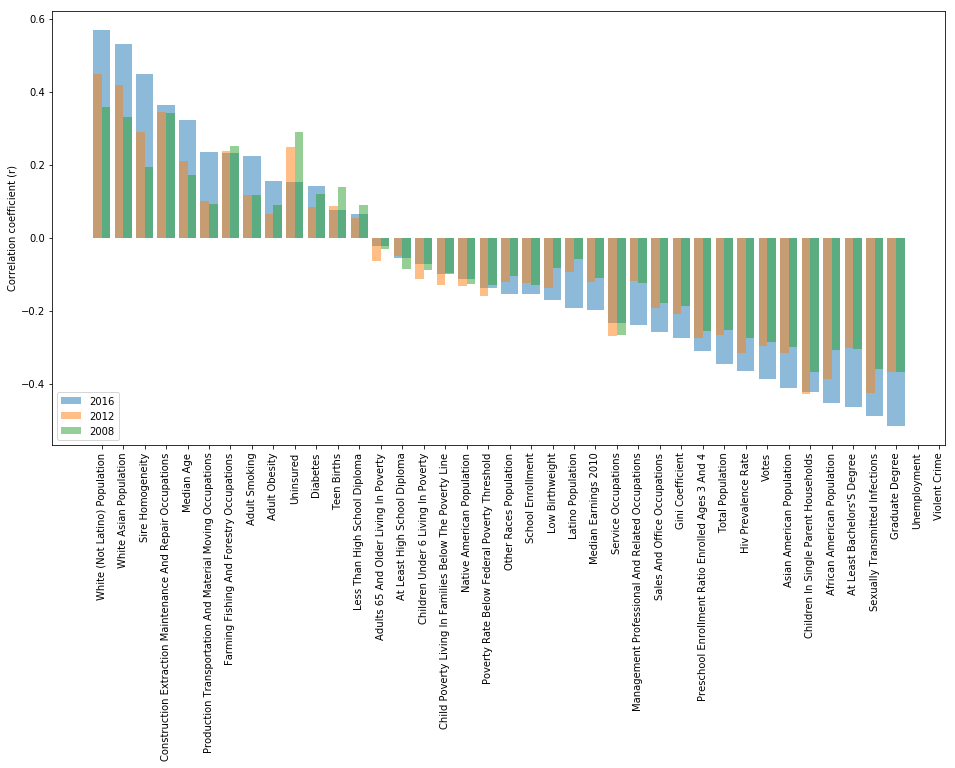

In [45]:
# Stacked bar chart for the correlation coefficient for each election year. 
pylab.rcParams['figure.figsize'] = (16.0, 8.0)
p1 = plt.bar(corr_df.index, height = corr_df["rvalues 2016"], alpha = 0.5, align = 'center', width = 0.8)
p2 = plt.bar(corr_df.index, height = corr_df["rvalues 2012"], alpha = 0.5, align = 'edge', width = -0.4)
p3 = plt.bar(corr_df.index, height = corr_df["rvalues 2008"], alpha = 0.5, align = 'edge', width = 0.4)
plt.ylabel("Correlation coefficient (r)")
plt.xticks(rotation=90)
plt.legend((p1[0], p2[0], p3[0]), ('2016', '2012','2008'))
plt.show()

From the bar plot above, we can see that generally 2016 election is more polaried than the other two elections, meaning those variables that are correlated (either positively or negatively) to the Republican relative vote share in 2008 and 2012 become even more so in 2016. Some exceptions include variables such as Uninsured, Teen Births, Adults 65 And Older Living in Poverty, At least High School Diploma, Children Under 6 Living in Poverty, Native American Population, Adult Smoking and Service Occupations. These variables have a lower correlation (either positively or negatively) in 2016 than in 2008 and 2012. However, these categories have correlation values less than abs(0.3). This can be illustrated further by using a heat map. 

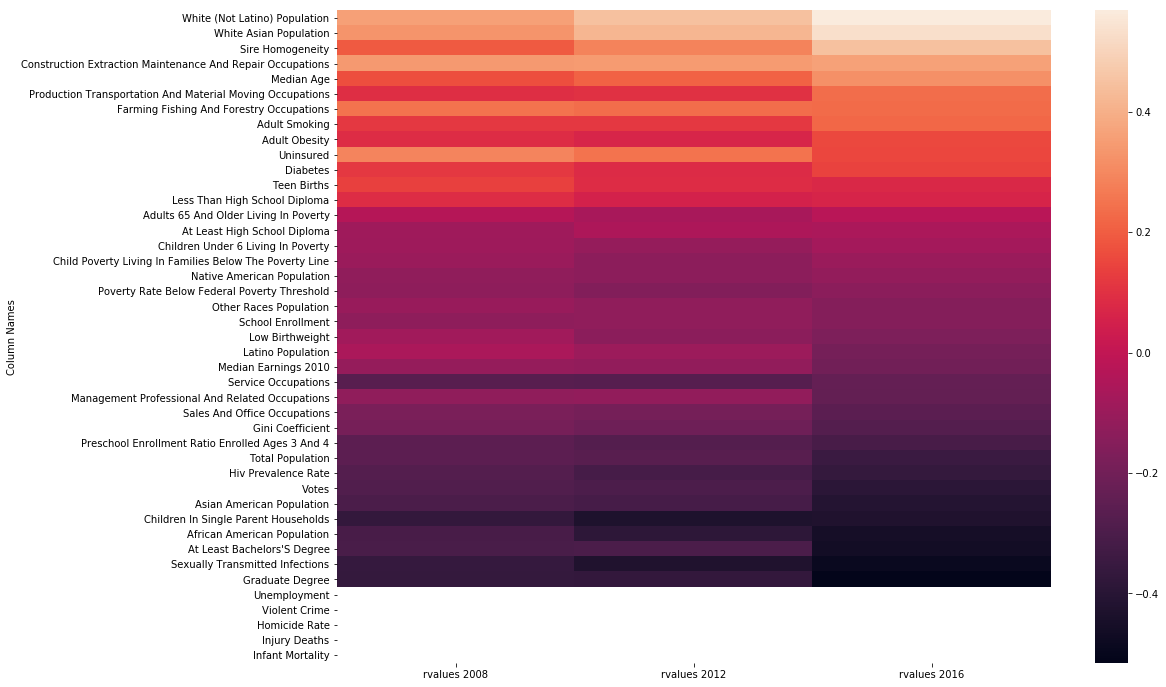

In [46]:
# Heatmap for correlation coefficient
pylab.rcParams['figure.figsize'] = (16.0, 12.0)
sns.heatmap(corr_df[["rvalues 2008","rvalues 2012","rvalues 2016"]])
plt.xlabel
plt.show()

We can see here that the as we go from 2008 to the 2016, the map goes lighter if it's positively correlated and goes darker if it's negatively correlated. The trends in 2016 also exist in 2012 and 2008, such as White (Not Latino) population still have the highest positive correlation to the Republican relative vote share. White Asian Population is also consistently high but since it's a sum of Asian and White Population, this is not a surprising trend. 

While counties with high Graduate Degree have high negative correlation in 2012 and 2008 elections to the Republican relative vote share, it's even more negatively correlated in 2016. This trend is similar to counties with high percentages of people having "At least Bachelor's Degree". Sexually Diseases are also consistently negatively correlated.

What's interesting is the variables that show a jump in the correlation such as Production Transportation And Material Moving Occupations, whose correlation coefficient doubles positively in 2016. On the opposite end, Latino Population and Management Professional And Related Occupations also double negatively in 2016 i.e. they vote Democrats more than they did in 2012 and 2008. It is important to note that in the correlation values for these categories are relatively small i.e. ~0.2 and ~-0.2 respectively. 

#### 2. How are the racial demographics correlated with Republican vote share? Is there any race which is consistently correlated with the Republican vote share?

Since Total Population is the sum of all racial demographics and White Asian Population is the sum of the White Population and Asian, I'm going to ignore them for analyzing the trend in racial demographics. 

In [47]:
# Making another dataframe, which only has the correlation values for the population
pop_corr_df = corr_df[corr_df.index.str.contains("Population")].drop(["White Asian Population","Total Population"])
pop_corr_df

,rvalues 2016,rvalues 2012,rvalues 2008,pvalues 2016,pvalues 2012,pvalues 2008
Column Names,,,,,,
White (Not Latino) Population,0.568430,0.447917,0.359315,2.478188e-268,7.324368e-155,2.354358e-96
Native American Population,-0.114374,-0.132837,-0.125745,1.287719e-10,7.720816e-14,1.520445e-12
Other Races Population,-0.153336,-0.122342,-0.104228,5.554246e-18,5.996570e-12,4.768101e-09
Latino Population,-0.192464,-0.094183,-0.058100,1.371349e-27,1.235938e-07,1.123312e-03
Asian American Population,-0.411360,-0.316406,-0.300455,1.494986e-128,5.629058e-74,1.532265e-66
African American Population,-0.453223,-0.387985,-0.308344,5.893598e-159,2.290054e-113,3.679225e-70


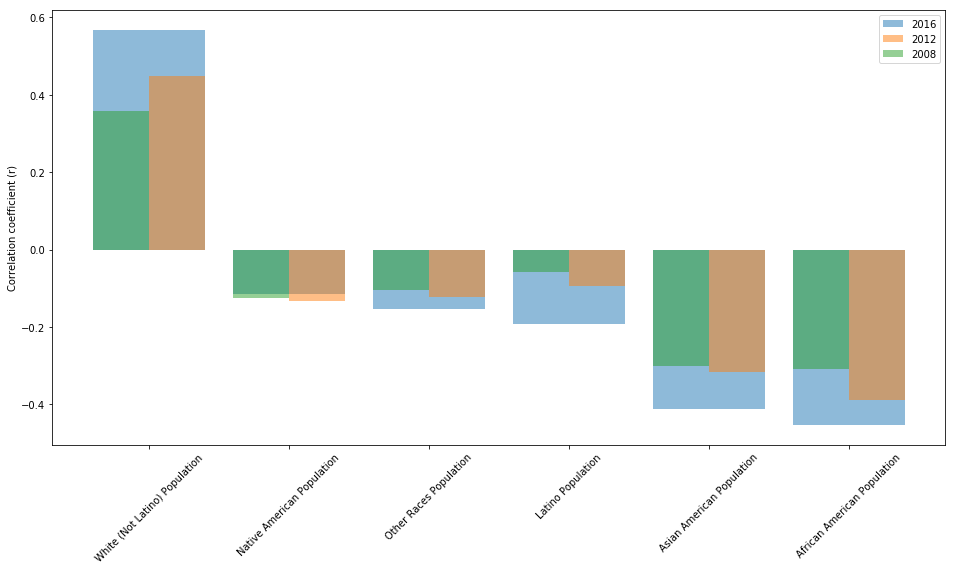

In [48]:
# Stacked bar chart for the correlation coefficient for the population for each election year. 
pylab.rcParams['figure.figsize'] = (16.0, 8.0)
p1 = plt.bar(pop_corr_df.index, height = pop_corr_df["rvalues 2016"], alpha = 0.5, align = 'center', width = 0.8)
p2 = plt.bar(pop_corr_df.index, height = pop_corr_df["rvalues 2012"], alpha = 0.5, align = 'edge', width = 0.4)
p3 = plt.bar(pop_corr_df.index, height = pop_corr_df["rvalues 2008"], alpha = 0.5, align = 'edge', width = -0.4)
plt.ylabel("Correlation coefficient (r)")
plt.xticks(rotation=45)
plt.legend((p1[0], p2[0], p3[0]), ('2016', '2012','2008'))
plt.show()

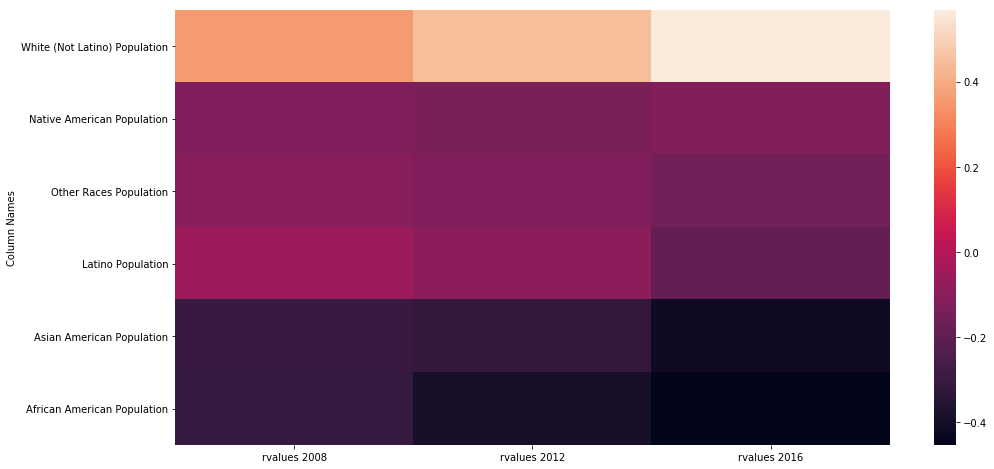

In [49]:
# Heatmap for correlation coefficient for the population
pylab.rcParams['figure.figsize'] = (16.0, 8.0)
sns.heatmap(pop_corr_df[["rvalues 2008","rvalues 2012","rvalues 2016"]])
plt.xlabel
plt.show()

From the p-values, all the racial demographics are significantly correlated to the Republican vote share, either positively or negatively.

For White Population, they are consistently and positively correlated with the Republican vote share throughout the three elections. African American, Asian American, Latino and Other Races are negatively correlated throughout the three election years. Native American correlation coefficient was more positively correlated in 2016 even though their correlation coefficients were small. 

Looking at the bar chart and the heat map, one trend that can be seen is that the 2016 election polarizes the racial demographics even more. The demographic that is positively correlated to the Republican relative vote share in 2012 and 2008 becomes even more so in 2016 and vice versa. 

#### 3. Does the pattern you found in the last question still hold when you split up the data by state? For example, if you found that a particular race was highly correlated with a political party across the whole dataset, does the same pattern hold for the counties in California, or Texas? Which races remain positively (or negatively) correlated with a party in each state? Are there races which seem to change between states?

Let's merge the two dataframes first into one dataframe called merged_df and then group them by state. 

In [50]:
# Merging the two dataframes "data" and "votes" based on their Fips number
merged_df = pd.merge(votes, data, on = "Fips")

# Grouping the data based on their states 
grouped = merged_df.groupby("State")

# To get the state names 
state_names = grouped.groups.keys()

Now I will create a pivoted multi-index dataframe, where the columns are the Racial Demographics and the Year, while the row index is the state. p-values less than 0.05 is filtered out in this dataframe.

In [51]:
# Creating empty dictionaries 
dicts_2016 = {}
dicts_2012 = {}
dicts_2008 = {}

# Setting the population
pop_list = ['White (Not Latino) Population', 'Native American Population', 
            'Other Races Population', 'Latino Population','Asian American Population', 
            'African American Population'] 

for i in state_names:
    for j in pop_list: 
        x = grouped.get_group(i)
        y = grouped.get_group(i)
        # Filtering out those that have p-values < 0.05 plus California and Texas:
        if (((stats.pearsonr(x["votes16_trumpd (%)"], y[j]))[1]) < 0.05) or (i == "California") or (i == "Texas"):    
            # Putting in the r values into dictionaries where the keys are states (i) and race (j)
            dicts_2016[i,j, 2016] = (stats.pearsonr(x["votes16_trumpd (%)"], y[j])[0])
            dicts_2012[i,j, 2012] = (stats.pearsonr(x["Republicans 12 (%)"], y[j])[0])
            dicts_2008[i,j, 2008] = (stats.pearsonr(x["Republicans 08 (%)"], y[j])[0])

# Converting dictionaries into a dataframe
corr_2016 = pd.DataFrame(dicts_2016, index = ["r"]).unstack()
corr_2012 = pd.DataFrame(dicts_2012, index = ["r"]).unstack()
corr_2008 = pd.DataFrame(dicts_2008, index = ["r"]).unstack()

# Modifying the dataframes 
corr_2016 = pd.DataFrame(pd.DataFrame(dicts_2016, index = ["r"],).unstack())
corr_2016.reset_index(inplace = True)
corr_2016.drop(['level_3'], axis = 1, inplace = True)
corr_2012 = pd.DataFrame(pd.DataFrame(dicts_2012, index = ["r"],).unstack())
corr_2012.reset_index(inplace = True)
corr_2012.drop(['level_3'], axis = 1, inplace = True)
corr_2008 = pd.DataFrame(pd.DataFrame(dicts_2008, index = ["r"],).unstack())
corr_2008.reset_index(inplace = True)
corr_2008.drop(['level_3'], axis = 1, inplace = True)

# Combining all the election years into 1 dataframe
corr_states = pd.concat([corr_2016,corr_2012,corr_2008], axis = 0)
corr_states.rename(columns = {"level_0": "States", "level_1":"Racial Demographic",
                              "level_2":"Year",0:"r"}, inplace = True)

# Creating a pivot table
pivot_states = pd.pivot_table(corr_states, index = "States", columns = ["Racial Demographic","Year"], values = "r")
pivot_states.head()

Racial Demographic African American Population                      \
Year                                      2008      2012      2016   
States                                                               
Alabama                              -0.961484 -0.970193 -0.977568   
Arizona                                    NaN       NaN       NaN   
Arkansas                             -0.817194 -0.871512 -0.876910   
California                           -0.258139 -0.296283 -0.299724   
Colorado                                   NaN       NaN       NaN   

Racial Demographic Asian American Population                      \
Year                                    2008      2012      2016   
States                                                             
Alabama                                  NaN       NaN       NaN   
Arizona                                  NaN       NaN       NaN   
Arkansas                                 NaN       NaN       NaN   
California                         -0.560712 -0.581246 -0.623558   
Colorado                           -0.358237 -0.353890 -0.445552   

Racial Demographic Latino Population                      \
Year                            2008      2012      2016   
States                                                     
Alabama                     0.360495  0.367593  0.366494   
Arizona                          NaN       NaN       NaN   
Arkansas                         NaN       NaN       NaN   
California                 -0.084094 -0.135333 -0.205703   
Colorado                         NaN       NaN       NaN   

Racial Demographic Native American Population                      \
Year                                     2008      2012      2016   
States                                                              
Alabama                                   NaN       NaN       NaN   
Arizona                                   NaN       NaN       NaN   
Arkansas                             0.415436  0.452091  0.432923   
California                           0.101651  0.101260  0.174936   
Colorado                                  NaN       NaN       NaN   

Racial Demographic Other Races Population                      \
Year                                 2008      2012      2016   
States                                                          
Alabama                          0.373236  0.377630  0.407981   
Arizona                               NaN       NaN       NaN   
Arkansas                         0.318083  0.319074  0.274939   
California                      -0.210428 -0.196709 -0.141544   
Colorado                        -0.301593 -0.309872 -0.347418   

Racial Demographic White (Not Latino) Population                      
Year                                        2008      2012      2016  
States                                                                
Alabama                                 0.965395  0.973690  0.981008  
Arizona                                 0.725453  0.808033  0.787873  
Arkansas                                0.782296  0.836664  0.872512  
California                              0.331748  0.390931  0.455961  
Colorado                                0.342722  0.401799  0.274254

Let's chart a simple line graph and see whether the trend holds. Please note that there will gaps in the line graph because for those areas where the correlation coefficient is not significantly correlated, there will be gaps. 

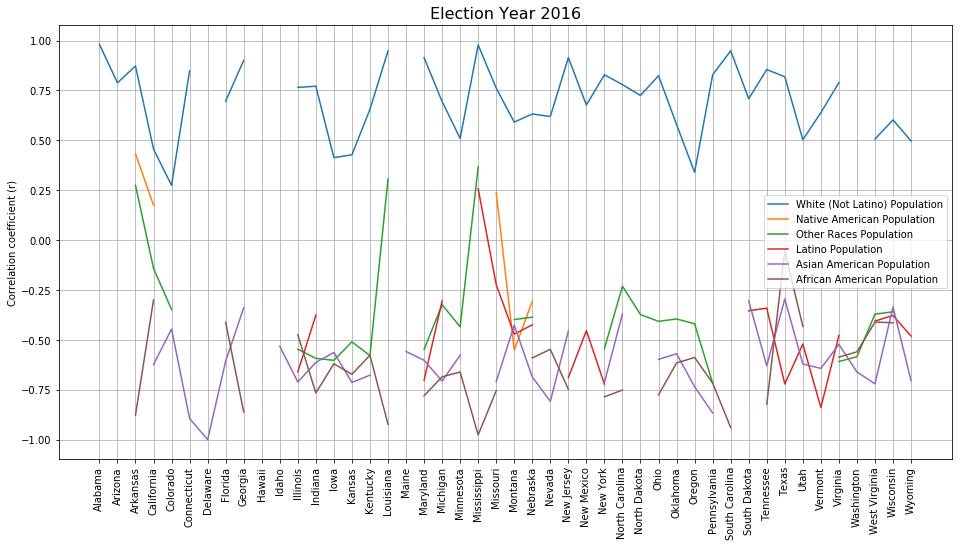

In [52]:
# A line chart for 2016
pylab.rcParams['figure.figsize'] = (16.0, 8.0)
for i in pop_list:
    plt.plot(pivot_states.index,pivot_states[i][2016],label=i)
plt.title("Election Year 2016", size = 16)
plt.ylabel("Correlation coefficient (r)")
plt.xticks(rotation=90)
plt.grid()
plt.legend(pop_list,loc = "center right")
plt.show()

As previously seen before, there is a divide between the population groups. White (Not Latino) Population has a high positive correlation compared to the rest of the groups. Asian American and African American generally have a low correlation to the Republican vote share across the states. Latino and Native American has a lot of missing values since their p-values show that their correlation values are not signicantly correlated.

Comparing from state, it is interesting to see that depending on the states, the correlation coefficient changes. For example, in Texas, African American and Asian American correlation value is the highest amongst all the states. In California and Oregon, the correlation values for White (Not Latino) Population drops down to one of the lowest numbers. 

It's important to note that the demographics that have non-significant correlation values might be due to the low number of population in there. For example, Latino and Other Race have significant correlation values in Mississipi probably because their population is concentrated there. 

Now, let's compare the data for each election year in a heat map. I will also turn off the scrollable auto window for ease of readibility

In [53]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

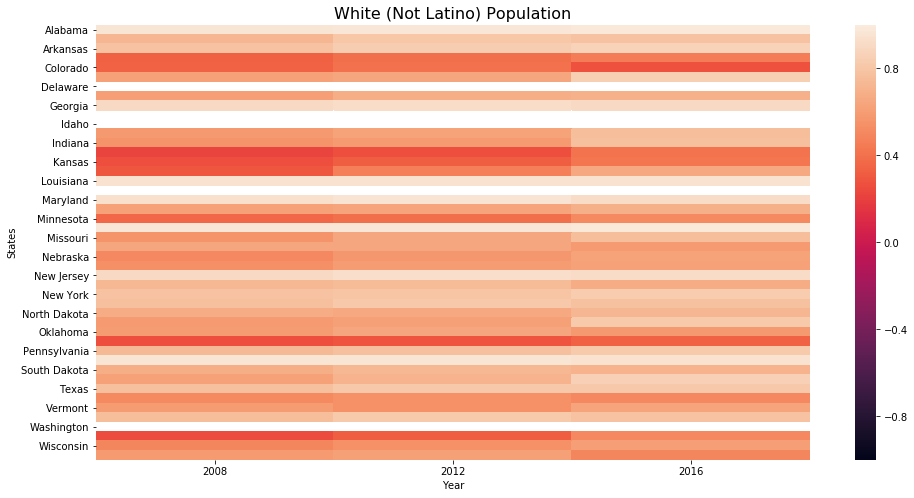

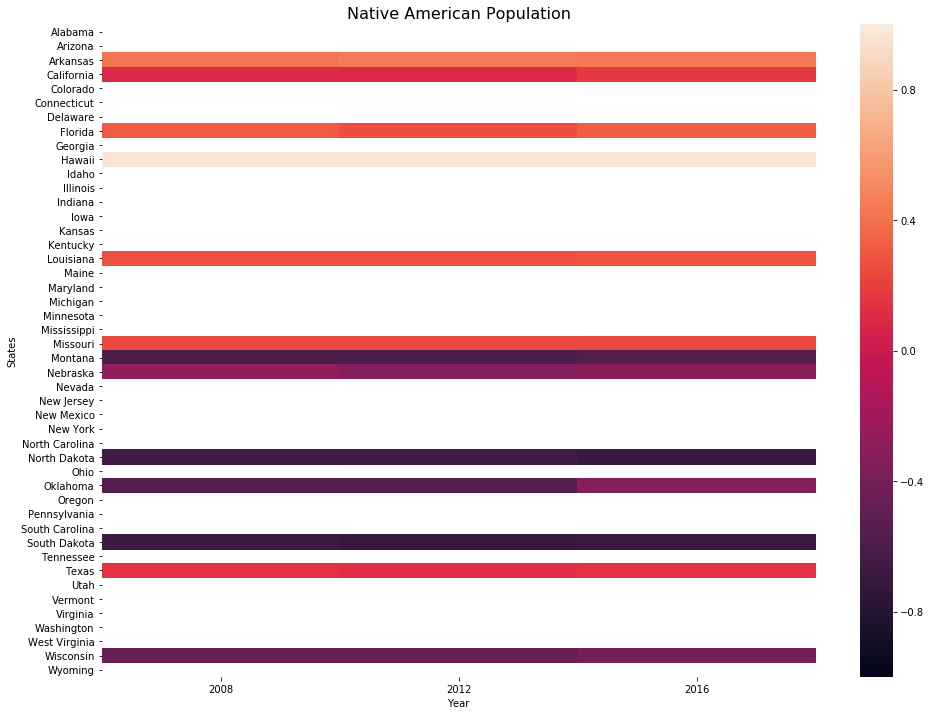

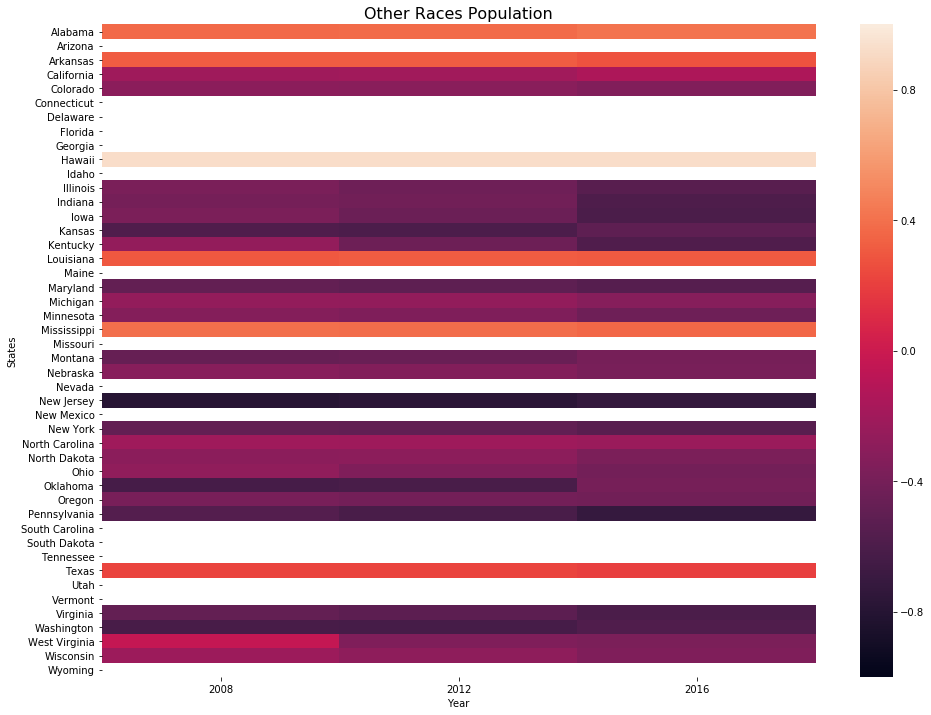

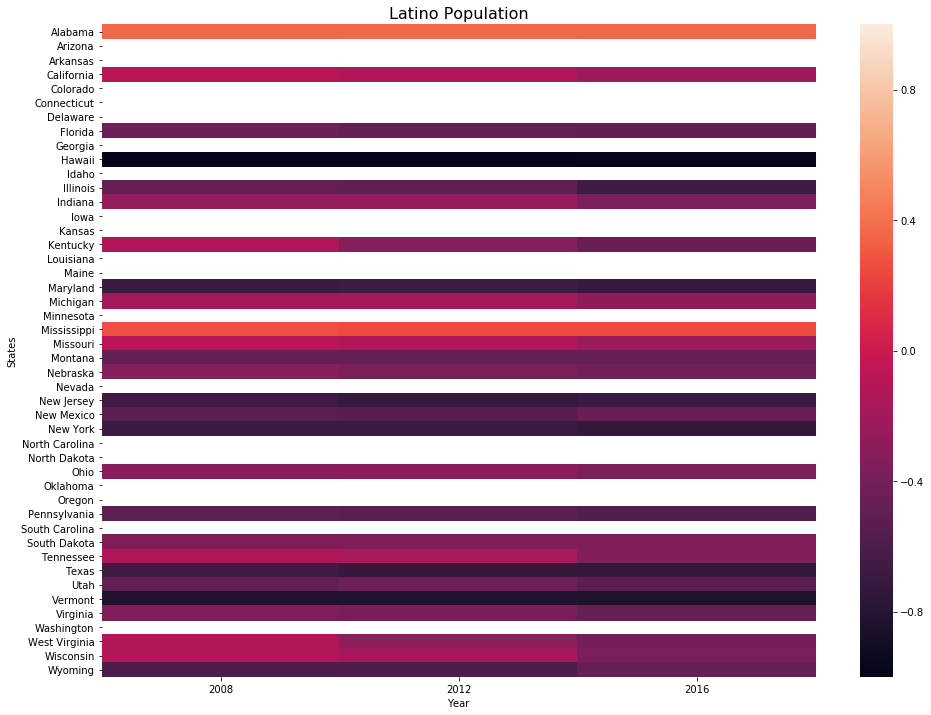

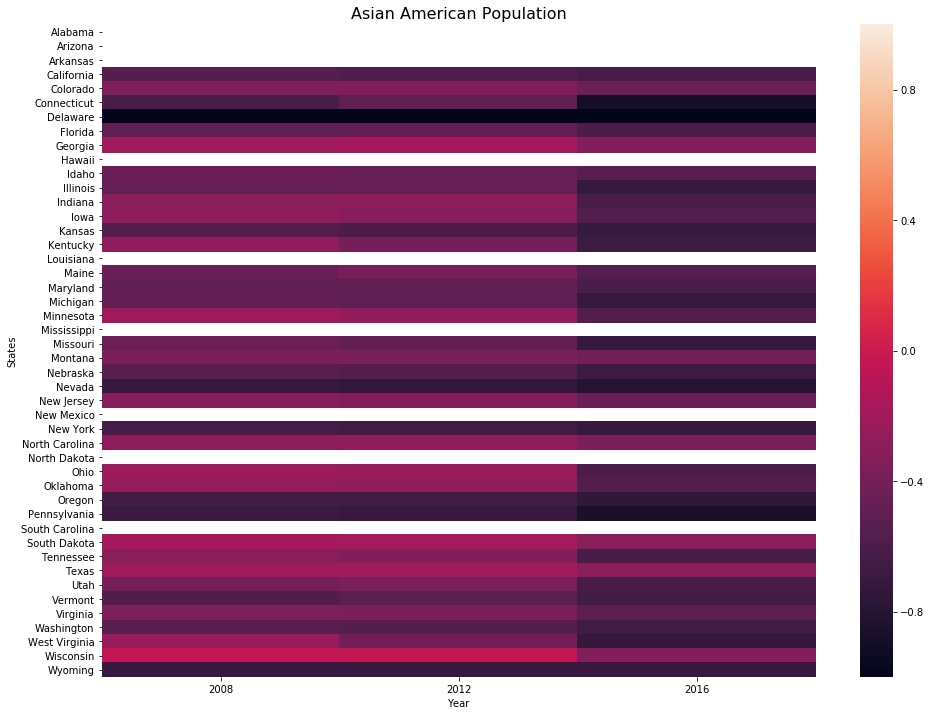

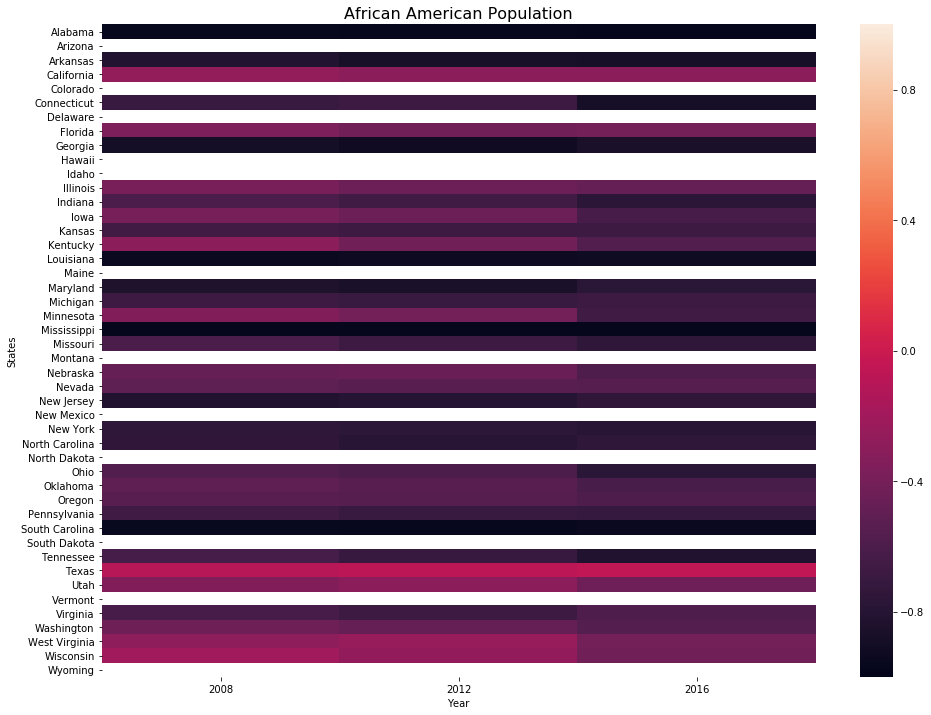

<Figure size 1152x864 with 0 Axes>

In [54]:
# Let's look at the each racial demographic group in a heat map. All the heat maps are normalized from -1 to 1.

f = plt.figure()

for i in range(len(pop_list)): 
    # f.add_subplot(3, 2, i+1)
    pylab.rcParams['figure.figsize'] = (16.0, 12.0)
    sns.heatmap(pivot_states[pop_list[i]], vmin = -1, vmax = 1)
    xticks(rotation = 0)
    plt.title(pop_list[i], size = 16)
    plt.show()
plt.tight_layout()
#plt.subplots_adjust(top = 1, bottom=0.01, hspace=0.4, wspace=0.25)


From the heatmap above, we can see that for the majorities of the states, the Native American Population are not significantly correlated to the Republican vote share. 

For the White (Not Latino) Population, we can see a clear distinction in correlation values between different states. For example, states that are consistently Republican in 2008 and 2012 like Alabama, Maryland and South Carolina become even more positively correlated to the Republican. While states that have low correlation coefficients lean slightly more towards the Republican in 2016 such as in California, Oregon, Iowa and Kansas etc. 

Majorities of the correlation coefficients for the Native American are not significantly correlate but the trends for the ones that are present remain consistent between each election year and divided dependent on the states. For example, Arkansas has a relatively high positive correlation coefficient (0.5) throughout while South and North Dakota have a high negative correlation coefficient (-0.8). 

Asian American and African American Population have a similar trend, where they have a high negative correlation. Texas is an exception for African American Population, where the correlation value becomes more sensitive in that state. It is worth nothing for in general, for both of these demographics, the correlation values decrease in 2016. This can be seen in Connecticut and and Wisconsin for Asian American demographics. 

Other races and Latino population are either neutral, where their correlation coefficients are around 0 or slightly negative. The stand out are states such as Alabama, Arkansas and Misssissipi. 

### Analysis Part 2
In this part we will perform some more advanced statistical analysis on the data.

#### 1. At a county level visualize the percentage share of the Republican votes in each election. What visualization method is most appropriate for this task? We are asking for three plots, one for each election.

Visualizing the percentage share of the Republican votes in each county is difficult if we look at each point individually since there are more than 3000 data points. I will use histogram here to see the distribution for the percentage share of the Republican votes in each election. 

In [55]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

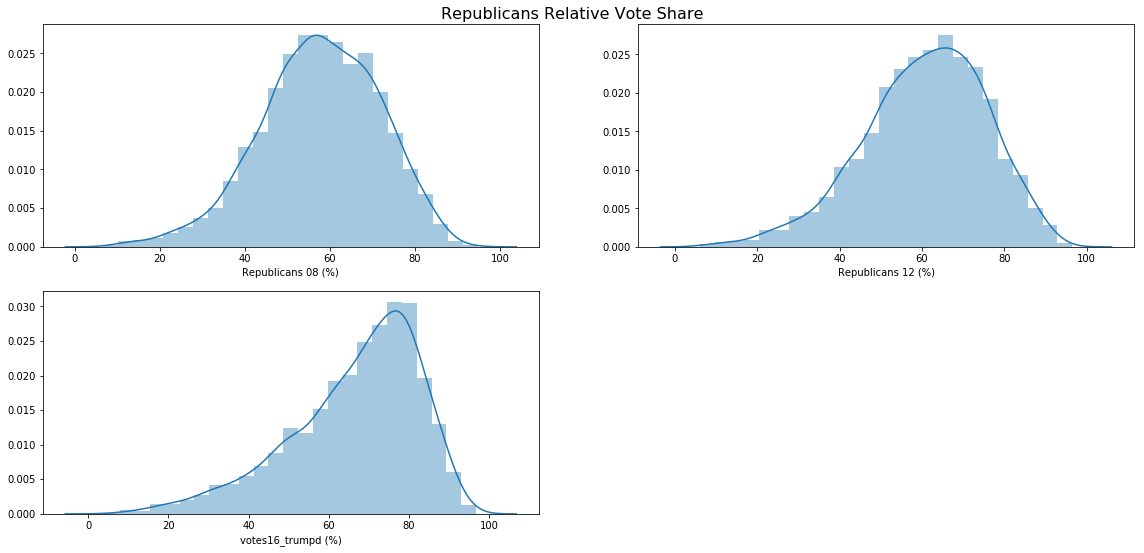

In [56]:
# Plot a histogram for the relative vote shares for the Republicans by counties
f = plt.figure()
republican_cols = ["Republicans 08 (%)","Republicans 12 (%)","votes16_trumpd (%)"]
for i in range(len(republican_cols)):
    f.add_subplot(2, 2, i+1)
    # Plotting the histogram, with column name as the x-label and the index number in the nulls list as the title
    sns.distplot(votes[republican_cols[i]], bins = 25)
plt.tight_layout()
plt.subplots_adjust(top = 0.7, bottom=0.1, hspace=0.2, wspace=0.2)
plt.subplots_adjust(top=0.95)
plt.suptitle("Republicans Relative Vote Share", size = 16)
plt.show()

#### 2. Would you say the three elections are similar to each other?(Note that this is a subjective question. How do you define similarity here? Tell us how you're defining similarity and based on your definition, tell us whether or not these elections are the similar.)

First, let's plot these histograms together and see whether they're similar to each other.

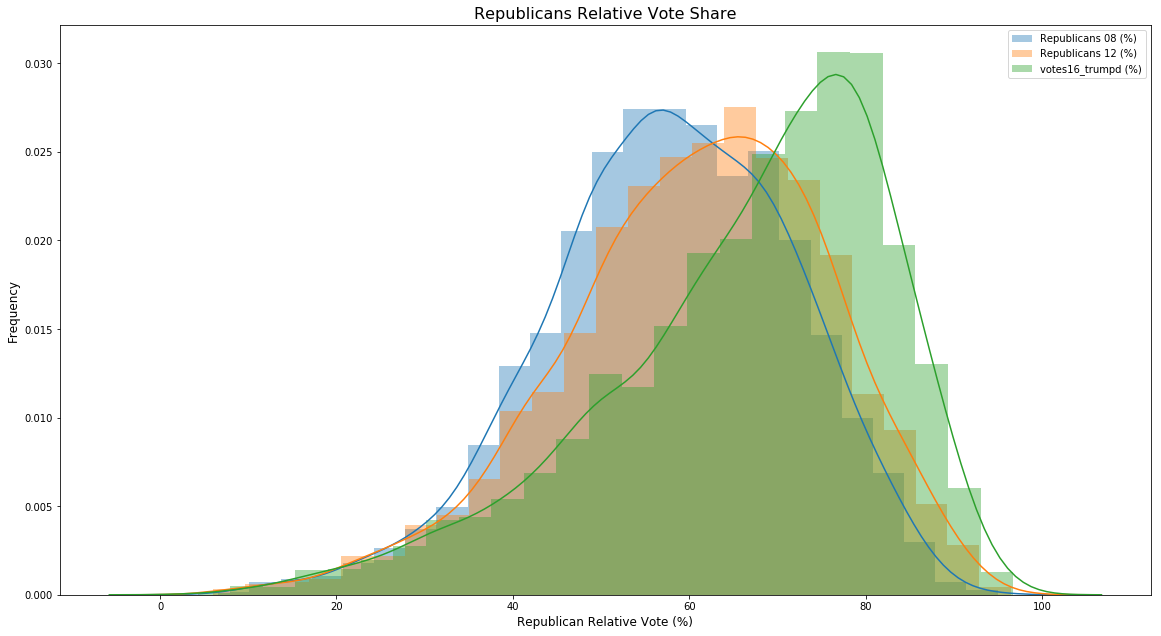

In [57]:
# Plot a histogram for the relative vote shares for the Republicans by counties
f = plt.figure()
republican_cols = ["Republicans 08 (%)","Republicans 12 (%)","votes16_trumpd (%)"]
for i in range(len(republican_cols)):
    sns.distplot(votes[republican_cols[i]], bins = 25, label = republican_cols[i])
plt.tight_layout()
plt.legend(republican_cols)
plt.xlabel("Republican Relative Vote (%)", size = 12)
plt.ylabel("Frequency", size = 12)
plt.title("Republicans Relative Vote Share", size = 16)
plt.subplots_adjust(top = 1, bottom=0.01, hspace=0.2, wspace=0.2)
plt.show()

There seems to be a difference in the distribution between each election year from the histogram. I will use a one-way ANOVA to see how similar the distribution for the Republican Relative Vote between each year is. 
I'm defining similarity here as how similar the distribution is. Essentially, my null hypothesis is the mean for the distribution in each election year is statistically equal to each. Setting my critical p-value to 0.05 as usual, let's run the one-way ANOVA to see the F-value.

In [58]:
# One-way ANOVA
stats.f_oneway(votes["Republicans 08 (%)"], votes["Republicans 12 (%)"], votes["votes16_trumpd (%)"])

F_onewayResult(statistic=282.47086107039337, pvalue=7.28257602993501e-120)

The p-value is less than p_critical of 0.05 so I'm rejecting the null hypothesis that mean-value is the same for these three election years and that they are significantly different statistically. 

#### 3. Repeat this exercise, but now aggregate the data at a state level (Instead of finding the vote share of a party within a county, find the vote share of a party within a state.) Has your answer changed about the similarity of the three elections?

For this question, let's aggregate the data by the mean values first and plot the histogram for each election year. 

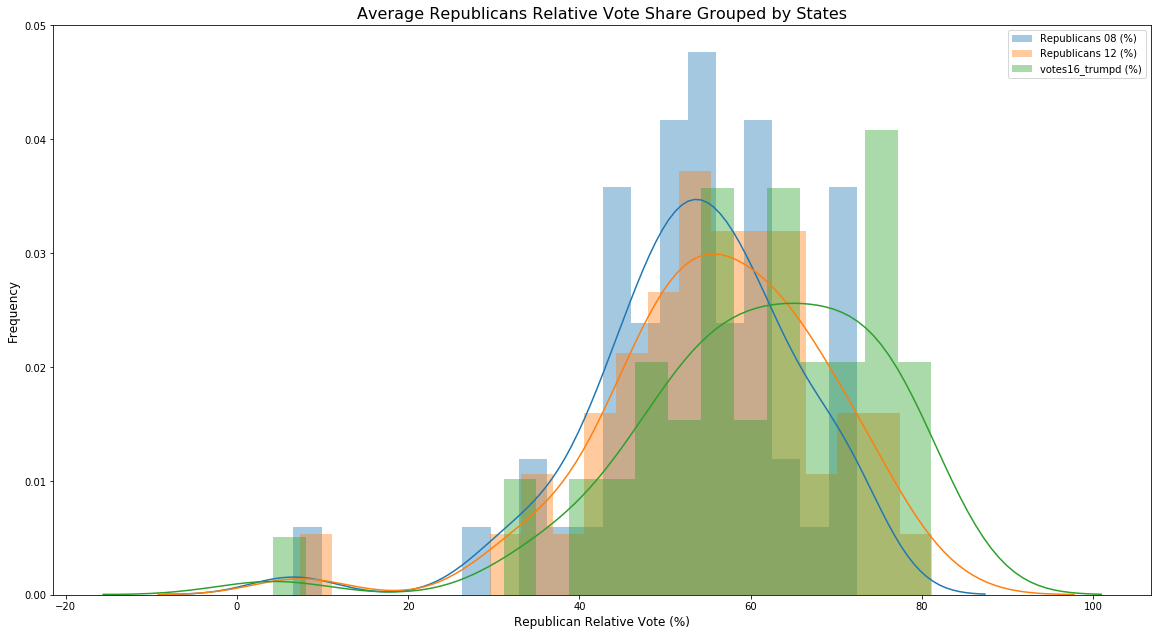

In [59]:
# Creating a dataframe where the votes are grouped by state and by the mean values 
grouped_mean = merged_df.groupby("State").mean()

# Plot a histogram for the relative vote shares for the Republicans by counties
f = plt.figure()
republican_cols = ["Republicans 08 (%)","Republicans 12 (%)","votes16_trumpd (%)"]
for i in range(len(republican_cols)):
    sns.distplot(grouped_mean[republican_cols[i]], bins = 20)
plt.tight_layout()
plt.legend(republican_cols)
plt.xlabel("Republican Relative Vote (%)", size = 12)
plt.ylabel("Frequency", size = 12)
plt.title("Average Republicans Relative Vote Share Grouped by States", size = 16)
plt.subplots_adjust(top = 1, bottom=0.01, hspace=0.2, wspace=0.2)
plt.show()

Let's do the one-way ANOVA for this data that is grouped by states and then two-sampled, two-tailed t-test on the 2012 and 2016 elections. 

In [60]:
# One-way ANOVA
stats.f_oneway(grouped_mean["Republicans 08 (%)"], grouped_mean["Republicans 12 (%)"], 
               grouped_mean["votes16_trumpd (%)"])

F_onewayResult(statistic=4.461055147572731, pvalue=0.01312260871193254)

In [61]:
# t-test between 2016 and 2012 elections
stats.ttest_ind(grouped_mean["Republicans 12 (%)"], grouped_mean["votes16_trumpd (%)"])

Ttest_indResult(statistic=-1.8617247907652874, pvalue=0.06557862025237046)

In [62]:
stats.ttest_ind(grouped_mean["Republicans 08 (%)"], grouped_mean["votes16_trumpd (%)"])

Ttest_indResult(statistic=-2.9244445292411116, pvalue=0.004269206537298386)

From the one-way ANOVA, the p-value is < 0.05 signifying that the mean of distributions for the three elections is significantly different. However, the two-sampled t-test between the election year of 2012 and 2016 has a p-value > 0.05, which means that the mean of the distribution between the election year 2012 and 2016 is similar when we grouped the data by states. The p-value of the t-test between the election year of 2008 and 2016 indicate that the mean of the two election years is significantly different from each other. 

Now, let's look at how the data looks like for each state in a line graph. 

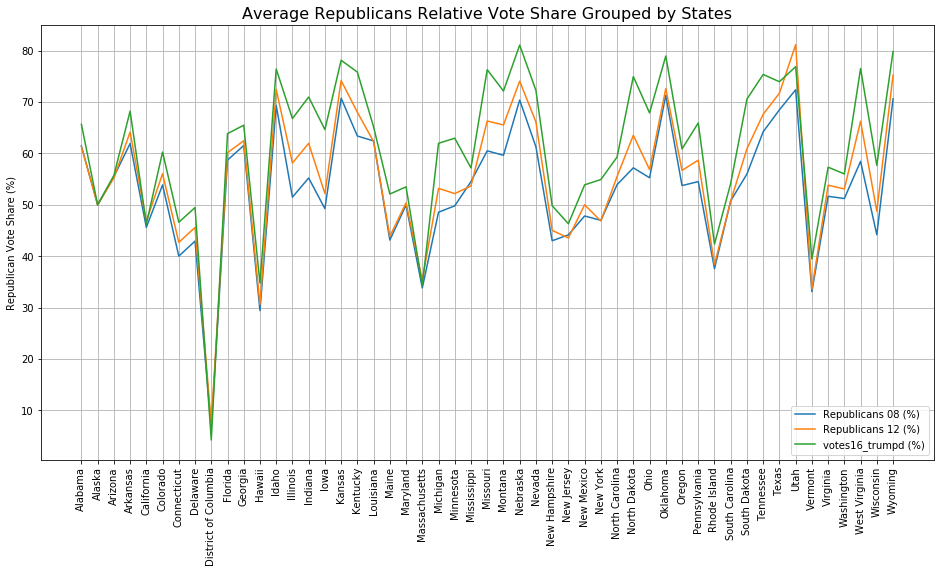

In [63]:
# A line chart for each election year grouped by the states
pylab.rcParams['figure.figsize'] = (16.0, 8.0)
republican_cols = ["Republicans 08 (%)","Republicans 12 (%)","votes16_trumpd (%)"]
for i in republican_cols:
    plt.plot(grouped_mean.index,grouped_mean[i],label=i)
plt.title("Average Republicans Relative Vote Share Grouped by States", size = 16)
plt.ylabel("Republican Vote Share (%)")
plt.xticks(rotation=90)
plt.grid()
plt.legend(republican_cols,loc = "lower right")
plt.show()

We can see from the line graph that each election generally follows the same trend across each state. Those states that have a high Republican vote share in 2008 and 2012 still have high Republican vote share in 2016. Looking from this perspective, we can say that the three elections are similar. 

However, in 2016, the Republican vote share is even more amplified compared to the rest of the years. Those states that have Republican vote share around 50-60% jumped to 60 - 70% in some states such as in Ilinois, Indiana, Iowa, Michigan, Minnesota, North Dakota and Ohio. From this perspective, the election in 2016 differs in the unexpected jump of Republican vote share in some of the states.

### Analysis Part 3
Create a model which measures the fraction of votes a party (Republican) gets within a county based on the county data. When building your model keep the following points in mind:

#### 1. What are the data points? What are the dependent and independent variables?

The dependent variable for this exercise is the fraction of votes that Republicans for the year 2008, 2012 and 2016. 


In [64]:
dep_all = pd.DataFrame({'Republican Vote Fraction' : merged_df[['Republicans 08 (%)', 'Republicans 12 (%)', 
                                                                'votes16_trumpd (%)']].mean(axis=1)})

If the goal of the model is to predict the outcome of the election in 2016, it also makes sense to use the past election data in 2008 and 2012 as the train set and the 2016 data as the test set so I'm going to average the fraction of votes for 2008 and 2012.

In [65]:
dep_08_12 = pd.DataFrame({'Republican Vote Fraction' : merged_df[['Republicans 08 (%)', 'Republicans 12 (%)']].mean(axis=1)})

The independent variables are those variables that have high correlation values. From our correlation dataframe before, we can apply a cut-off correlation coefficient. Let's include only those variables with correlation coefficient greater than 0.3 and less than -0.3. 

In [66]:
cond_2016 = (abs(corr_df["rvalues 2016"])>=0.1) & (corr_df["pvalues 2016"] < 0.05)
cond_2012 = (abs(corr_df["rvalues 2012"])>=0.1) & (corr_df["pvalues 2012"] < 0.05)
cond_2008 = (abs(corr_df["rvalues 2008"])>=0.1) & (corr_df["pvalues 2008"] < 0.05)
independent = corr_df.loc[(cond_2016) | (cond_2012)| (cond_2008)]

White Asian Population is the sum of the White and Asian Population while the Total Population is the sum of all population. Including these columns are going to bias our model so let's drop these. 

In [67]:
independent.drop(["White Asian Population","Total Population"], inplace = True)

Let's see how many independent variables we end up using for the model. 

In [68]:
len(independent)

33

#### 2. We are asking you to fit the fraction of votes that the Republican party gets within a county, this value is any continuous value between 0 and 1. What model is appropriate for this sort of problem?

The fraction of votes that the Republican party gets within a county is a continuous value between 0 and 1. Logistic regression model is suitable in this case. Even though our final result is a continuous value in the form of fraction instead of discrete values of 0 and 1, this problem is essentially a classification problem with a binary dependent variable of Republican vs. Democrat. For this case though, the binary dependent variable is just transformed to a continuous fraction value between 0 and 1. 

Linear regression can also be suitable for this sort of problem. However, to use linear regression for this model, we have to transform the dependent variable from y to z where: $$ z = log(\frac{y}{1 - y}) $$
We can then apply linear regression to z. 

I will do both to see how both models perform. 

To fit the fraction of votes that the Republican party gets within a county i.e. the "y-value", I will two different cases. First, I will use the average fraction of votes from all the election years in 2008, 2012 and 2016. In the second one, I will only use the average fraction of votes for only the years in 2008 and 2012. 

In the real-world scenario where the model is supposed to predict the outcome of the 2016 election, it makes sense to fit only the Republican fraction votes data from 2008 and 2012 as our training data. 

##### Logistic Regression

In [69]:
# Logistic regression model where y is the average Republican vote fraction from 2008, 2012 and 2016

# Define our X and y
X = merged_df[independent.index]
y_all = dep_all/100

# Create model
logit = sm.Logit(y_all,X)

# Fit our model on the data
result = logit.fit()

# Predict the result
ypredict_all = result.predict(X)
result.summary()

Optimization terminated successfully.
         Current function value: 0.582088
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                              
====================================================================================
Dep. Variable:     Republican Vote Fraction   No. Observations:                 3141
Model:                                Logit   Df Residuals:                     3108
Method:                                 MLE   Df Model:                           32
Date:                      Fri, 08 Mar 2019   Pseudo R-squ.:                 -0.2482
Time:                              22:30:28   Log-Likelihood:                -1828.3
converged:                             True   LL-Null:                       -1464.8
                                              LLR p-value:                     1.000
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
White (Not Latino) Population                                 -0.0189      0.545     -0.035      0.972      -1.087       1.049
Sire Homogeneity                                              -1.1609      0.491     -2.365      0.018      -2.123      -0.199
Construction Extraction Maintenance And Repair Occupations     0.0499      0.545      0.092      0.927      -1.018       1.118
Median Age                                                    -0.0255      0.013     -2.015      0.044      -0.050      -0.001
Production Transportation And Material Moving Occupations      0.0291      0.545      0.053      0.957      -1.040       1.098
Farming Fishing And Forestry Occupations                       0.0497      0.545      0.091      0.927      -1.019       1.118
Adult Smoking                                                 -0.4938      0.875     -0.564      0.573      -2.210       1.222
Adult Obesity                                                  0.2015      1.657      0.122      0.903      -3.046       3.449
Uninsured                                                      3.9891      1.252      3.187      0.001       1.536       6.443
Diabetes                                                       5.3992      3.517      1.535      0.125      -1.495      12.293
Teen Births                                                    0.0070      0.004      1.750      0.080      -0.001       0.015
Children Under 6 Living In Poverty                            -0.0013      0.008     -0.166      0.868      -0.016       0.014
Child Poverty Living In Families Below The Poverty Line        0.0065      0.015      0.425      0.671      -0.023       0.036
Native American Population                                    -0.0482      0.545     -0.088      0.930      -1.116       1.020
Poverty Rate Below Federal Poverty Threshold                  -0.0286      0.022     -1.309      0.191      -0.072       0.014
Other Races Population                                        -0.0583      0.546     -0.107      0.915      -1.128       1.012
School Enrollment                                              0.0012      0.009      0.124      0.901      -0.017       0.020
Low Birthweight                                                2.8454      3.145      0.905      0.366      -3.319       9.010
Latino Population                                             -0.0451      0.545     -0.083      0.934      -1.113       1.023
Median Earnings 2010                                       -8.637e-06   1.42e-05     -0.610      0.542   -3.64e-05    1.91e-05
Service Occupations                                            0.0224      0.545      0.041      0.967      -1.046       1.091
Management Professional And Related Occupations                0.0611      0.545      0.112      0.911      -1.007       1.130
Sales And Of

In [70]:
# Logistic regression model where y is the average Republican vote fraction from 2008 and 2012

# Define our X and y
X = merged_df[independent.index]
y_08_12 = dep_08_12/100

# Create the logistic model
logit = sm.Logit(y_08_12,X)

# Fit our model on the data
result = logit.fit()

# Predict the result
ypredict_08_12 = result.predict(X)

Optimization terminated successfully.
         Current function value: 0.607095
         Iterations 5


Let's put the logistic prediction values together in a dataframe.

In [71]:
log_pred = pd.DataFrame([ypredict_all,ypredict_08_12], index = ["Logistic_All","Logistic_08_12"]).transpose()
log_pred.head()

,Logistic_All,Logistic_08_12
0,0.582486,0.568814
1,0.807944,0.781215
2,0.675190,0.658349
3,0.554339,0.573762
4,0.644630,0.627530


##### Linear Regression

In [72]:
# Linear regression model where y is the average Republican vote fraction from 2008, 2012 and 2016

# Define our X and y
X_lin = sm.add_constant(merged_df[independent.index].values)
# y is the same as the one in logistic regression
# Transform the y to z so that we can use linear regression on z
z_all = np.log(y_all/(1-y_all))

# Create the linear model
olsmod = sm.OLS(z_all, X)

# Fit our model on the 2008, 2012 and 2016 model
olsres = olsmod.fit()

# Predict the z and then transform it back to y
zpredict_all = olsres.predict(X)
ypredict_all_lin = np.exp(zpredict_all)/(np.exp(zpredict_all)+1)

In [73]:
# Linear regression model where y is the average Republican vote fraction from 2008 and 2012
X_lin = sm.add_constant(merged_df[independent.index].values)
# y is the same as the one in logistic regression
# Transform the y to z so that we can use linear regression on z
z_08_12 = np.log(y_08_12/(1-y_08_12))

# Create the linear model
olsmod = sm.OLS(z_08_12, X)

# Fit our model on the 2008, 2012 and 2016 model
olsres = olsmod.fit()

zpredict_08_12 = olsres.predict(X)
ypredict_08_12_lin = np.exp(zpredict_08_12)/(np.exp(zpredict_08_12)+1)


Let's put the linear prediction values together in a dataframe.

In [74]:
# Putting all the prediction values together in a list 
lin_pred = pd.DataFrame([ypredict_all_lin,ypredict_08_12_lin],index = ["Linear_all","Linear_08_12"]).transpose()
lin_pred.head()

,Linear_all,Linear_08_12
0,0.588441,0.574520
1,0.815571,0.789560
2,0.679153,0.662316
3,0.569869,0.587333
4,0.646674,0.629718


#### 3. How good is the fit of your model? (You can fit and evaluate it on the entire dataset.)

To evaluate the fit of the model, I can evaluate it on the average Republican fraction of votes or just on the election year of 2016. Hence, I have 4 different choices of prediction values and two y-true-values I can evaluate my model on. 

Using the $R^2$ value to evaluate the fit of my model, I will have 8 different $R^2$ depending on the combinations of prediction values and y-values I will use them on. 

In [75]:
# Creating the y-value from only the 2016 election
y_16 = pd.DataFrame(merged_df["votes16_trumpd (%)"]/100)

# Creating a dataframe for the true y-values
y_true = pd.concat([y_all, y_16], axis = 1)
y_true.rename(columns = {"Republican Vote Fraction":"y_all","votes16_trumpd (%)":"y_16"}, inplace = True)

##### Logistic Regression

In [76]:
# Importing all the metrics from sklearn
from sklearn.metrics import *

# Creating for loop to calculate the r2 values for all the combinations in the logistic regression model:
r2_log = []
for i in log_pred:
    for j in y_true:
        r2_log.append([r2_score(y_true[j],log_pred[i]),i,j])
        
df = pd.DataFrame(r2_log, columns = ["r2_log","Prediction","True"])
df.pivot_table(df, index = "Prediction", columns = "True")

r2_log          
True                y_16     y_all
Prediction                        
Logistic_08_12  0.497631  0.692162
Logistic_All    0.666947  0.732508

##### Linear Regression

In [77]:
# Creating for loop to calculate the r2 values for all the combinations in the linear regression model:

r2_lin = []
for i in lin_pred:
    for j in y_true:
        r2_lin.append([r2_score(y_true[j],lin_pred[i]),i,j])
        
df_lin = pd.DataFrame(r2_lin, columns = ["r2_lin","Prediction","True"])
df_lin.pivot_table(df_lin, index = "Prediction", columns = "True")

r2_lin          
True              y_16     y_all
Prediction                      
Linear_08_12  0.519237  0.699935
Linear_all    0.682025  0.731010

##### Validation Conclusion

From the two tables above, we can see that once set up properly, the performance of both the linear and logistic regression is similar to each other. The best $R^2$ for both models happens when we're fitting the predicted values of Republican fraction votes for all election years (2008, 2012 and 2016) and evaluate them against the true values Republican fraction votes for all election years i.e. $R^2$ is ~75%. The worst $R^2$ is when we fit only the 2008 and 2012 Republican fraction votes and evaluate them against the true values of 2016 Republican fraction votes i.e. $R^2$ is ~50%. 

Looking back at the analysis of Republican Relative Vote across all states, this result makes sense. We can already see that these three election years are significantly different from each other so using only 2008 and 2012 data will result in a lower $R^2$ value. 

Furthermore, the relatively low $R^2$ values can be explained by the large number of independent variables used in the model. Using the regression models, I assumed that the independent variables are independent of each other and are not correlated to each other but it might not be the case, i.e. multicollinearity might exist in the model. 

Personally, I don't think using $R^2$ value is enough to evaluate the performance of each model. To truly evaluate the performance of the model, predicting the electoral votes for each state will be the correct evaluation. Electoral vote prediction is a binary classification problem since it's a winner takes all. As such, the accuracy score for the logistic regression model can be evaluated for this.  

#### Bonus: How would you deal with data points which don't have all of the features present? That is, if we gave you the stats of a county which only contained the racial data and we wanted to know what your model predicts the vote share will be, how will you fill in the missing data?

One way I would deal predict the vote share for counties that only contained the racial data is to set up a regression model with only the racial data as the independent variables to predict what the vote share would be. However, with only the racial data as the independent variable, I would predict that the model performance will be poor. 

Another way is to fill in the missing data points by predicting the missing values using regression models. Once the missing values are filled in, we can then include the data in our model to predict the vote share for those counties. 

Another way, which is quite popular to fill in missing data points is to use the machine learning algorithms such as k-nearest neighbors (KNN) and random forest. For KNN, an example would be to predict the Graduate Degree fraction in that particular county by assuming that the Graduate Degree fraction of other counties with similar racial data will be the same. 

### Statistics and Politics - Deliverable 3
#### Introduction
In the previous deliverable, you build a model that predicts the fraction of votes that the Republican party gets within a county. The goal of this deliverable is create a model that predicts the outcome of an entire election (i.e. predicts who will become president).

#### US Election Background
Each of the 50 US states gets a certain number of electoral college votes, (this info is contained in the ec.csv file). The party that gets the majority of the vote share in a state receives all of that state's electoral college votes. The overall presidential winner is the party that gets the most electoral college votes.

#### Deliverable Requirements
There are many ways you can approach this challenge, but one possible way involves using your county-level preimpordictions from the model that you build last week to determine the vote share of a party within each state.

Whichever method you choose, describe to us the reasoning behind your model. Fit your model on the 2008 and 2012 election date and then use your model to predict the outcome of the 2016 election. Does your model predict the winner accurately?

### Modeling

#### Dependent Variables

Using 2008 and 2012 election data as training set, I'm going to convert the data format from "wide" to long

In [78]:
dep = pd.DataFrame(merged_df['Republicans 08 (%)'].append(merged_df["Republicans 12 (%)"])/100).reset_index()
dep.drop(columns = "index", inplace = True)

#### Independent Variables

The independent variables are those variables that have high correlation values. From our correlation dataframe before, we can apply a cut-off correlation coefficient. Let's include only those variables with correlation coefficient greater than 0.2 and less than -0.2 and only with p-values < 0.05

In [79]:
# Creating conditions to find out what independent variables that can be used: 
cond_2012 = (abs(corr_df["rvalues 2012"])>=0.2) & (corr_df["pvalues 2012"] < 0.05)
cond_2008 = (abs(corr_df["rvalues 2008"])>=0.2) & (corr_df["pvalues 2008"] < 0.05)
ind = corr_df.loc[(cond_2012)| (cond_2008)]

# Dropping the White Asian and Total Population from our independent variables
if ind.index.contains('White Asian Population'):
    ind.drop(["White Asian Population"], inplace = True)
elif ind.index.contains('Total Population'):
    ind.drop(["Total Population"], inplace = True)

# Since we're combining 2008 and 2012 data in the dependent variables,
# we need to double our independent variables as well
independent = merged_df[ind.index].append(merged_df[ind.index]).reset_index()
independent.drop(columns="index", inplace = True)

#### Logistic Regression Model

In [80]:
# Logistic regression model where y is the average Republican vote fraction from 2008 and 2012

# Define our X and y
X = independent
x = merged_df[ind.index]
y = dep

# Create the logistic model
logit = sm.Logit(y,X)

# Fit our model on the data
result = logit.fit()

# Predict the result
y_predict = result.predict(x)


Optimization terminated successfully.
         Current function value: 0.612289
         Iterations 5


Let's put the logistic prediction values together in a dataframe.

In [81]:
log_pred = pd.DataFrame([y_predict], index = ["y_predict"]).transpose()

### Weighting the Republican Relative Vote Share Based on County Votes in a State

Each county has a different number of total votes and a state, as a consequence has a different total number of states. Hence, our predicted probabilities of Republican vote fraction in each county (y_predict) needs to be weighted based on the fraction of total votes in each county over the total votes where the county is in. 

In [82]:
# Calculating the total of votes in each county for 2016 election
merged_df["Total 2016"] = merged_df["votes16_trumpd"] + merged_df["votes16_clintonh"]

# Create a dataframe that is grouped by the states and has the total sums of votes in each state
# You can replace the ["Votes"] here by ["Total 2008-2012"]
total_votes_state = merged_df.groupby("State")["Total 2016"].sum()

# Fill in the column for Total Votes per State in the merged_df dataframe 
# with values from total_votes_state based on their states
for i in merged_df.index:
    for j in range(len(total_votes_state)):
        if merged_df.loc[i, "State"] == total_votes_state.index[j]:
            merged_df.loc[i, "Total Votes per State"] = total_votes_state[j]

# Calculate the vote proportion for each county
merged_df["Vote Proportion"] = merged_df["Total 2016"]/merged_df["Total Votes per State"]

# Calculate the weighted predictions for both y_predict and y_true
merged_df["Weighted y_predict"] = log_pred["y_predict"]*merged_df["Vote Proportion"]
merged_df["Weighted y_true"] = merged_df["votes16_trumpd (%)"]/100*merged_df["Vote Proportion"]

### Predicting 2016 Election Result

#### Assigning electoral college votes
Electoral votes is a "winner-takes-all" in a state-all. The party that has the majority of the votes win all the electoral college votes. The threshold is hence 0.5. 

To calculate the y_predict per state, I will group all the counties by the state and calculate the sum of the weighted y_predict per county by state. 

In [83]:
# Grouping by state and aggregated by the sum of the fraction per county to calculate the frac
republican_fraction_df = merged_df.groupby("State")["Weighted y_predict","Weighted y_true"].sum().reset_index()

# Combining all the results into one dataframe and applying a threshold function to assign the EC votes 
# in each state
result = pd.merge(ec, republican_fraction_df, on = "State")
result["EC_predict"] = np.where(result["Weighted y_predict"] > 0.5, result["EC_votes"], 0)
result["EC_true"] = np.where(result["Weighted y_true"] > 0.5, result["EC_votes"], 0)
    
# Setting the index in the dataframe to be the states
result = result.set_index("State")
result

,EC_votes,Weighted y_predict,Weighted y_true,EC_predict,EC_true
State,,,,,
Alabama,9,0.534066,0.645403,9,9
Alaska,3,0.567557,0.500000,3,0
Arizona,11,0.476690,0.521692,0,11
Arkansas,6,0.610596,0.638473,6,6
California,55,0.364205,0.347222,0,0
Colorado,9,0.520534,0.484081,9,0
Connecticut,7,0.389173,0.430387,0,0
Delaware,3,0.421916,0.440003,0,0
District of Columbia,3,0.154568,0.042500,0,0


#### Model Evaluation based on Accuracy

In this section, I will calculate the accuracy of my model based on how many states I got the electoral college votes correct or not. 

Since each state has a different number of electoral votes, I will also calculate a weighted accuracy where if I predict the states with a high number of electoral college votes such as Texas, it'll matter more than states such as North Dakota. 

In [84]:
# Calculating how many times I got my EC votes correct
total_correct = np.where(result["EC_predict"] == result["EC_true"],1,0).sum()

# Calculating accuracy
print("We got", total_correct, "out of:", len(result), "correct.")
print("Accuracy:", round(total_correct/len(result)*100,2),"%")

# Weigh the electoral votes to calculate weighted accuracy because each state is assigned different number of electoral votes
weighted_EC_predict = result["EC_predict"]/result["EC_votes"].sum()
weighted_EC_true = result["EC_true"]/result["EC_votes"].sum()

# Calculating weighted accuracy:
print("Weighted accuracy:", round(weighted_EC_predict.sum()*100/weighted_EC_true.sum(),2),"%")

if result["EC_predict"].sum() > 270:
    print(f'The model predicts that Republican won with {int(result["EC_predict"].sum())} electoral votes')
else:
    print(f'The model predicts that Democrat won with {538 - int(result["EC_predict"].sum())} electoral votes')

# Calculating real electoral votes won by Republican in 2016
print(f'In 2016 Republican did win with {int(result["EC_true"].sum())} electoral votes')


We got 42 out of: 51 correct.
Accuracy: 82.35 %
Weighted accuracy: 90.07 %
The model predicts that Republican won with 272 electoral votes
In 2016 Republican did win with 302 electoral votes


As can be seen from the result above, the accuracy of the model is 82.35% while the weighted accuracy is 90% right. This is because the model predicts the states with the high number of electoral votes correctly, hence, resulting in higher weighted accuracy. These values look good enough for me so I'm leaving the model as it is. Furthermore, the model also predicts that the Republican wins the 2016 election. The prediction is quite borderline though, because if we actually drop the missing votes in Alaska, the model wasn't able to predict the votes correctly and would actually predict that the Democrats would win. However, since we flag Alaska instead of dropping them, the model is able to predict the votes correctly for Alaska.

The real total number of electoral votes is actually 306 electoral votes, not 302 but some states such as Maine actually split their electoral votes. Furthermore, the state of Alaska is missing in the data, which has 3 electoral votes that Republican did win. Hence, with Maine and Alaska, it'll be 306 votes. Despite the missing data in Alaska, the model predicts correctly that Republican won Alaska. 